In [5]:
%matplotlib inline
import os
import h5py
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm

from astropy import units, constants as const
from astropy.visualization import quantity_support

from simpleDS import cosmo

In [6]:
quantity_support();

In [23]:
data_files = sorted(Path(".").glob("set?_integrated_power_spectra.hdf5"))
long_good = sorted(Path(".").glob("set?_integrated_power_spectra_more_times.hdf5"))
long_bad = sorted(Path(".").glob("set?_integrated_power_spectra_long_bad_flags.hdf5"))
short_bad = sorted(Path(".").glob("set?_integrated_power_spectra_short_bad_flags.hdf5"))
short_good = sorted(Path(".").glob("set?_integrated_power_spectra_short_good_flags.hdf5"))
fringe_removed = sorted(Path(".").glob("set?_fringe_subtracted_integrated_power_spectra.hdf5"))
systematic_files = sorted(Path(".").glob("set?_integrated_power_spectra_with_systematic.hdf5"))

In [9]:
class PowerSpectra:
    def __init__(self, data_file):
        with h5py.File(data_file, "r") as h5file:
            for name, dset in h5file.items():
                if "unit" in dset.attrs:
                    setattr(
                        self, 
                        name, 
                        units.Quantity(dset[()], unit=dset.attrs["unit"]),
                    )
                elif name == "polarization_array":
                    self.polarization_array = np.asarray([x.decode() for x in dset[()]])
                else:
                    setattr(self, name, dset[()])

# Short Good

In [25]:
set_1 = PowerSpectra(short_good[0])
set_2 = PowerSpectra(short_good[1])
set_3 = PowerSpectra(short_good[2])
set_4 = PowerSpectra(short_good[3])

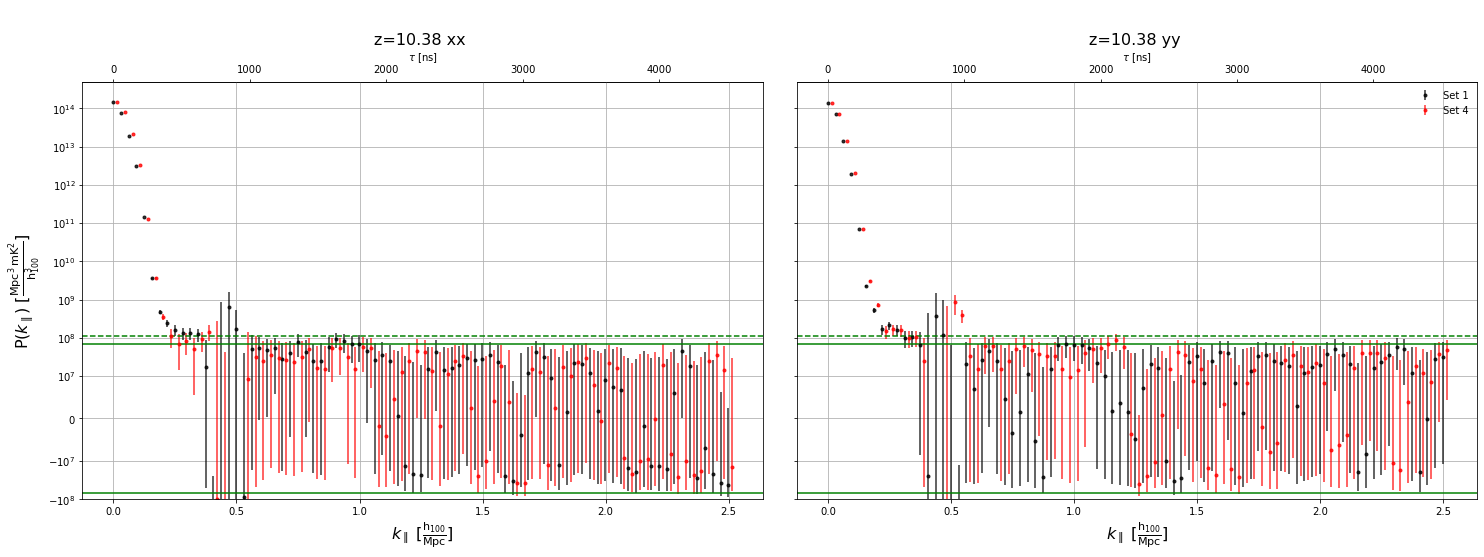

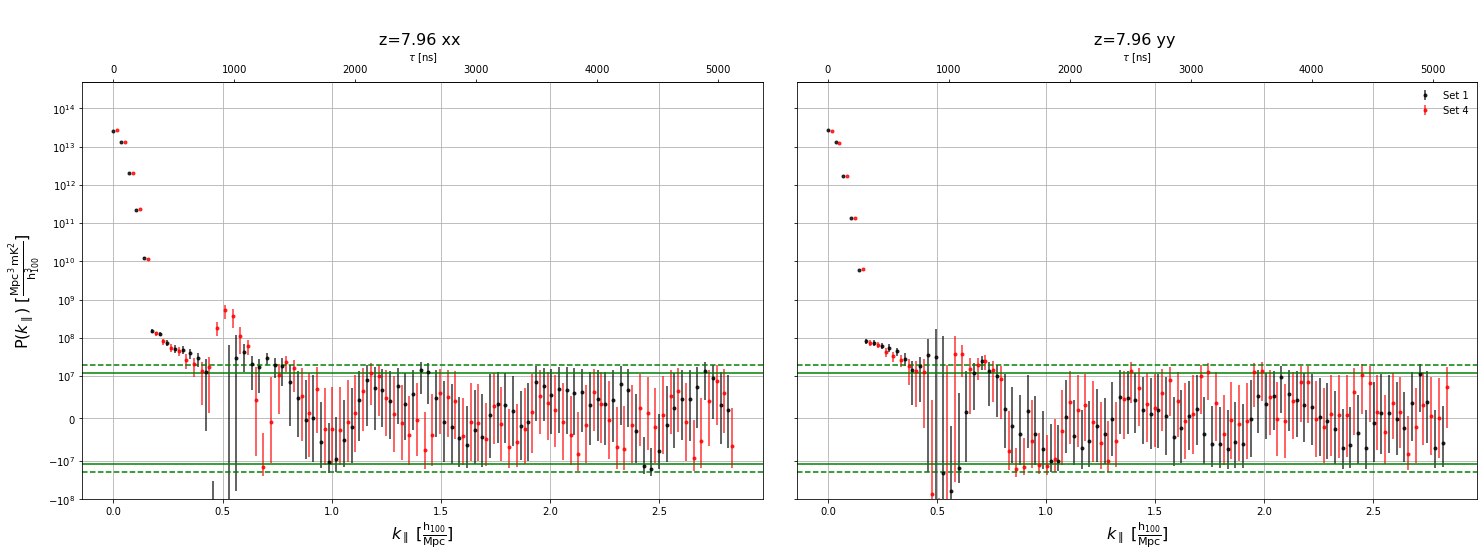

In [26]:
for z_cnt, redshift in enumerate(set_1.redshift):
    fig, ax = plt.subplots(
            ncols=2, 
            nrows=1, 
            figsize=(25,8),
            facecolor='white',
            sharex=True,
            sharey=True,
            squeeze=False
        )
    ax = ax.ravel()

    for pol_ind, pol in enumerate(set_1.polarization_array):
        ax[pol_ind].errorbar(
            set_1.k_parallel[z_cnt],
            set_1.avg_values[z_cnt, pol_ind].real,
            2 * set_1.avg_errors[z_cnt, pol_ind].real,
            fmt='k.', alpha=.8,
            label="Set 1" if pol_ind==1 else ''
        );
        ax[pol_ind].errorbar(
            set_4.k_parallel[z_cnt] + np.diff(set_4.k_parallel[z_cnt])[0]*1./2.,
            set_4.avg_values[z_cnt, pol_ind].real,
            2 * set_4.avg_errors[z_cnt, pol_ind].real,
            fmt='r.', alpha=.8,
            label="Set 4" if pol_ind==1 else ''
        );
#         ax[pol_ind].errorbar(
#             set_1.k_parallel[z_cnt][80:] + np.diff(set_1.k_parallel[z_cnt])[0]*2/3.,
#             set_1.avg_noise_values[z_cnt, pol_ind].real,
#             2 * set_1.avg_noise_errors[z_cnt, pol_ind].real,
#             fmt='.', color="XKCD:Orange", alpha=.5,
#             label="Data" if pol_ind==0 else ''
#         );
#         ax[pol_ind].plot(
#             ds_list[0].k_parallel[z_cnt][80:],
#             psf[80:] * avg_values[z_cnt, pol_ind].max(),
                
#         )

        ax[pol_ind].axhline(2 * set_1.avg_pn[z_cnt, pol_ind], color="green")
        ax[pol_ind].axhline(-2 * set_1.avg_pn[z_cnt, pol_ind], color="green")

        ax[pol_ind].axhline(2 * set_1.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        ax[pol_ind].axhline(-2 * set_1.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        
        ax[pol_ind].set_xlabel(r'$k_{{\parallel}}$ [{0}]'.format(set_1.k_parallel.unit.to_string('latex')), fontsize=16)
        ax[pol_ind].set_title(
            f"z={redshift:.2f} "
            f"{pol} "
            , fontsize=16,
        )
        if pol_ind == 0:
            ax[pol_ind].set_ylabel(r'P($k_{{\parallel}}$) [{0}]'.format((set_1.avg_values.unit).to_string('latex')), fontsize=16)
        else:
            ax[pol_ind].set_ylabel("")
        
        def forward(x):
            x = x * set_1.k_parallel.unit
            x = x.to("1/Mpc", units.with_H0(cosmo.default_cosmology.get().H0))
            return cosmo.kparr2eta(x, redshift).to_value("ns")
        def inverse(x):
            x = cosmo.eta2kparr(x  * set_1.delays.unit, redshift)
            x = x.to(set_1.k_parallel.unit, units.with_H0(cosmo.default_cosmology.get().H0)).value
            return x
        secax = ax[pol_ind].secondary_xaxis('top', functions=(forward, inverse))
        secax.set_xlabel(r"$\tau$ [ns]")
        
    sharex = ax[0].get_shared_x_axes()
    for pol_cnt in range(set_1.polarization_array.size):
        sharex.join(ax[0], ax[pol_cnt])
        ax[pol_cnt].grid();

    sharey = ax[0].get_shared_y_axes()
    for pol_cnt in range(set_1.polarization_array.size):
        sharey.join(ax[0], ax[pol_cnt])
    ax[0].set_yscale('symlog', linthresh=1e7)
    ax[0].set_ylim(-1e8, 5e14)
    ax[-1].legend(loc="upper right", frameon=False,)
    fig.subplots_adjust(wspace=.05, hspace=.175, top=.85)
    fig.suptitle(
        f" " 
    );
    plt.savefig(f"comparison_sets_1_4_z{redshift:.0f}.pdf")    

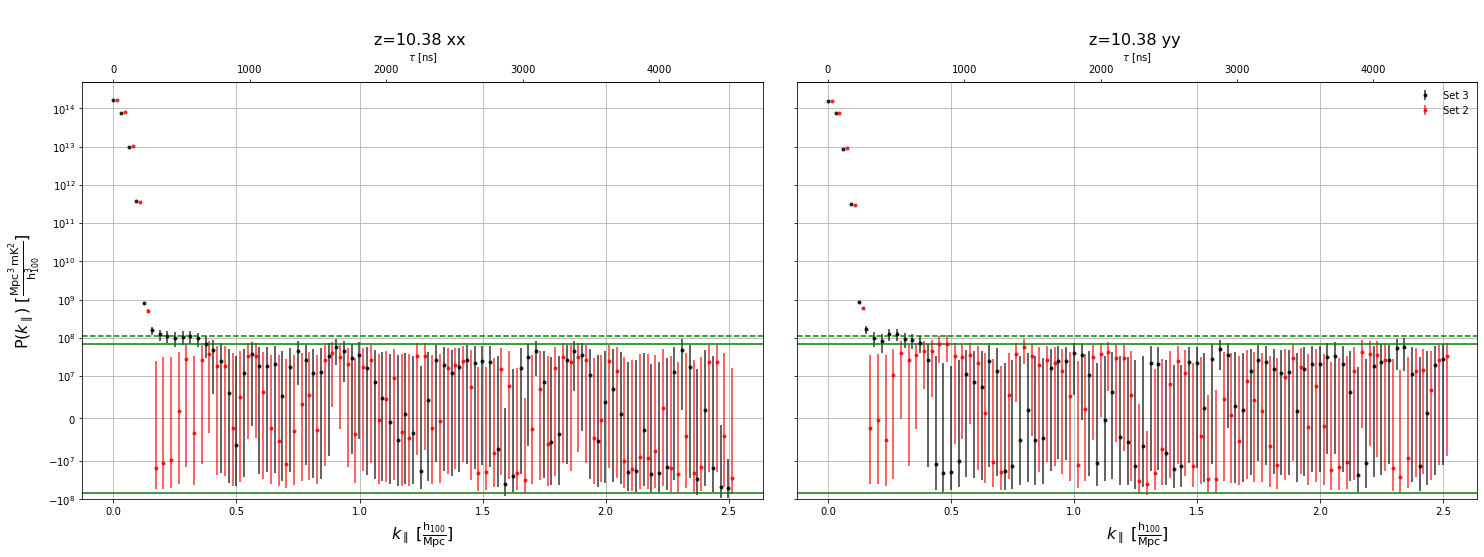

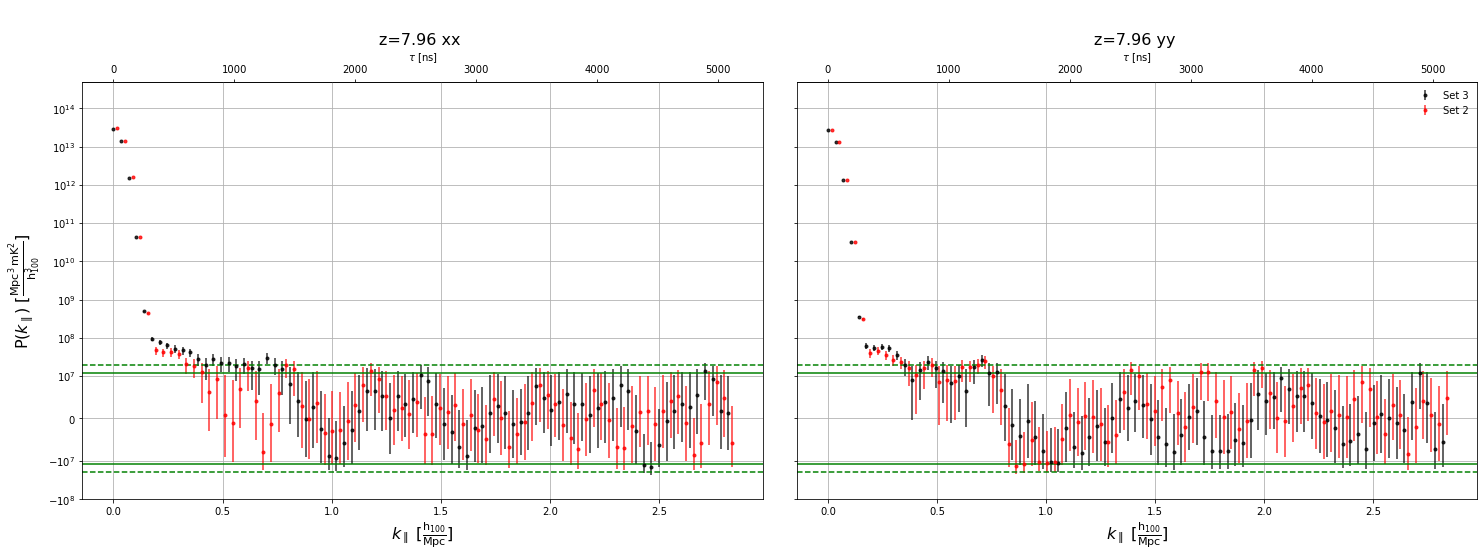

In [27]:
for z_cnt, redshift in enumerate(set_3.redshift):
    fig, ax = plt.subplots(
            ncols=2, 
            nrows=1, 
            figsize=(25,8),
            facecolor='white',
            sharex=True,
            sharey=True,
            squeeze=False
        )
    ax = ax.ravel()

    for pol_ind, pol in enumerate(set_1.polarization_array):
        ax[pol_ind].errorbar(
            set_3.k_parallel[z_cnt],
            set_3.avg_values[z_cnt, pol_ind].real,
            2 * set_3.avg_errors[z_cnt, pol_ind].real,
            fmt='k.', alpha=.8,
            label="Set 3" if pol_ind==1 else ''
        );
        ax[pol_ind].errorbar(
            set_2.k_parallel[z_cnt] + np.diff(set_2.k_parallel[z_cnt])[0]*1./2.,
            set_2.avg_values[z_cnt, pol_ind].real,
            2 * set_2.avg_errors[z_cnt, pol_ind].real,
            fmt='r.', alpha=.8,
            label="Set 2" if pol_ind==1 else ''
        );
#         ax[pol_ind].errorbar(
#             set_1.k_parallel[z_cnt][80:] + np.diff(set_1.k_parallel[z_cnt])[0]*2/3.,
#             set_1.avg_noise_values[z_cnt, pol_ind].real,
#             2 * set_1.avg_noise_errors[z_cnt, pol_ind].real,
#             fmt='.', color="XKCD:Orange", alpha=.5,
#             label="Data" if pol_ind==0 else ''
#         );
#         ax[pol_ind].plot(
#             ds_list[0].k_parallel[z_cnt][80:],
#             psf[80:] * avg_values[z_cnt, pol_ind].max(),
                
#         )

        ax[pol_ind].axhline(2 * set_3.avg_pn[z_cnt, pol_ind], color="green")
        ax[pol_ind].axhline(-2 * set_3.avg_pn[z_cnt, pol_ind], color="green")
        
        # multiply by a factor of 2 beacuse simpleDS overestimates the number of LST bins
        ax[pol_ind].axhline(2 * set_3.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        ax[pol_ind].axhline(-2 * set_3.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        ax[pol_ind].set_xlabel(r'$k_{{\parallel}}$ [{0}]'.format(set_1.k_parallel.unit.to_string('latex')), fontsize=16)
        ax[pol_ind].set_title(
            f"z={redshift:.2f} "
            f"{pol} "
            , fontsize=16,
        )
        if pol_ind == 0:
            ax[pol_ind].set_ylabel(r'P($k_{{\parallel}}$) [{0}]'.format((set_1.avg_values.unit).to_string('latex')), fontsize=16)
        else:
            ax[pol_ind].set_ylabel("")
        
        def forward(x):
            x = x * set_1.k_parallel.unit
            x = x.to("1/Mpc", units.with_H0(cosmo.default_cosmology.get().H0))
            return cosmo.kparr2eta(x, redshift).to_value("ns")
        def inverse(x):
            x = cosmo.eta2kparr(x  * set_1.delays.unit, redshift)
            x = x.to(set_1.k_parallel.unit, units.with_H0(cosmo.default_cosmology.get().H0)).value
            return x
        secax = ax[pol_ind].secondary_xaxis('top', functions=(forward, inverse))
        secax.set_xlabel(r"$\tau$ [ns]")
        
    sharex = ax[0].get_shared_x_axes()
    for pol_cnt in range(set_1.polarization_array.size):
        sharex.join(ax[0], ax[pol_cnt])
        ax[pol_cnt].grid();

    sharey = ax[0].get_shared_y_axes()
    for pol_cnt in range(set_1.polarization_array.size):
        sharey.join(ax[0], ax[pol_cnt])
    ax[0].set_yscale('symlog', linthresh=1e7)
    ax[0].set_ylim(-1e8, 5e14)
    ax[-1].legend(loc="upper right", frameon=False,)
    fig.subplots_adjust(wspace=.05, hspace=.175, top=.85)
    fig.suptitle(
        f" " 
    );
    plt.savefig(f"comparison_sets_2_3_z{redshift:.0f}.pdf")        

# Long Good

In [10]:
lst_set_1 = PowerSpectra(long_good[0])
lst_set_2 = PowerSpectra(long_good[1])
lst_set_3 = PowerSpectra(long_good[2])
lst_set_4 = PowerSpectra(long_good[3])

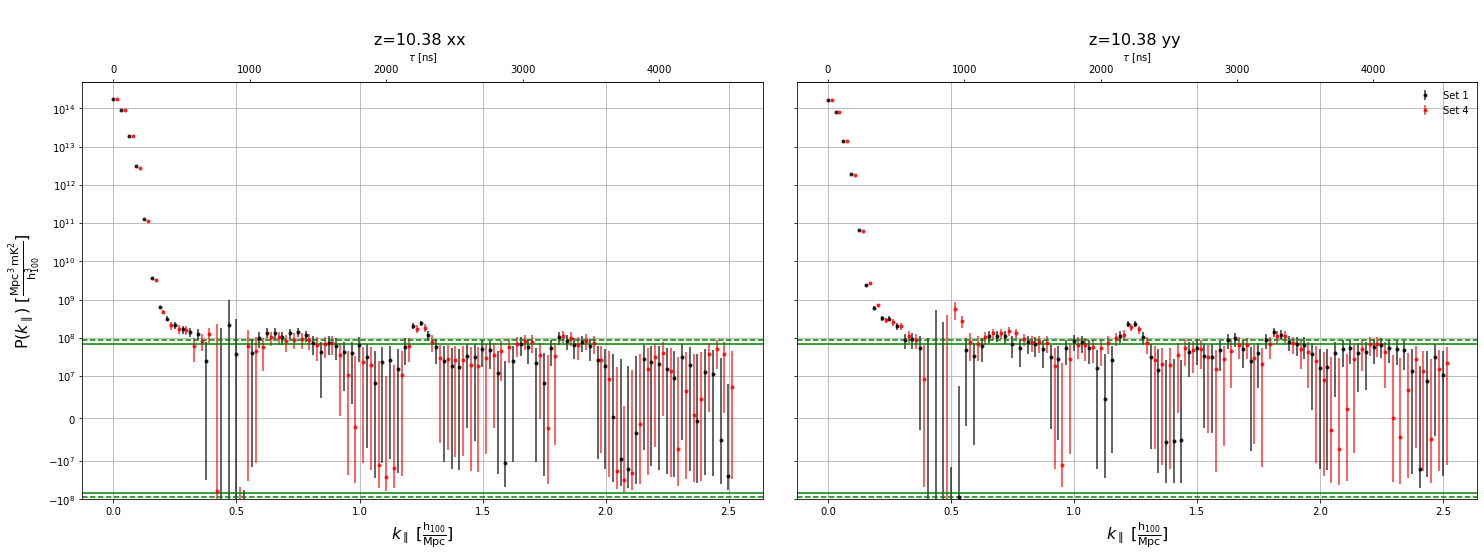

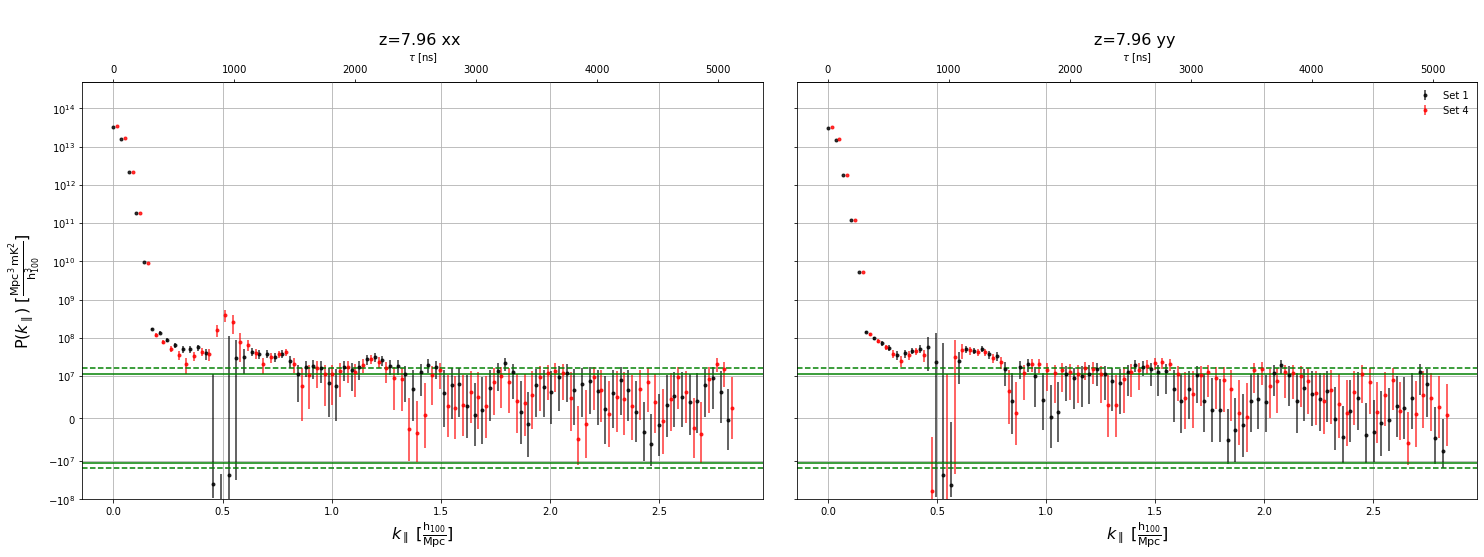

In [11]:
for z_cnt, redshift in enumerate(lst_set_1.redshift):
    fig, ax = plt.subplots(
            ncols=2, 
            nrows=1, 
            figsize=(25,8),
            facecolor='white',
            sharex=True,
            sharey=True,
            squeeze=False
        )
    ax = ax.ravel()

    for pol_ind, pol in enumerate(lst_set_1.polarization_array):
        ax[pol_ind].errorbar(
            lst_set_1.k_parallel[z_cnt],
            lst_set_1.avg_values[z_cnt, pol_ind].real,
            2 * lst_set_1.avg_errors[z_cnt, pol_ind].real,
            fmt='k.', alpha=.8,
            label="Set 1" if pol_ind==1 else ''
        );
        ax[pol_ind].errorbar(
            lst_set_4.k_parallel[z_cnt] + np.diff(lst_set_4.k_parallel[z_cnt])[0]*1./2.,
            lst_set_4.avg_values[z_cnt, pol_ind].real,
            2 * lst_set_4.avg_errors[z_cnt, pol_ind].real,
            fmt='r.', alpha=.8,
            label="Set 4" if pol_ind==1 else ''
        );
#         ax[pol_ind].errorbar(
#             set_1.k_parallel[z_cnt][80:] + np.diff(set_1.k_parallel[z_cnt])[0]*2/3.,
#             set_1.avg_noise_values[z_cnt, pol_ind].real,
#             2 * set_1.avg_noise_errors[z_cnt, pol_ind].real,
#             fmt='.', color="XKCD:Orange", alpha=.5,
#             label="Data" if pol_ind==0 else ''
#         );
#         ax[pol_ind].plot(
#             ds_list[0].k_parallel[z_cnt][80:],
#             psf[80:] * avg_values[z_cnt, pol_ind].max(),
                
#         )

        ax[pol_ind].axhline(2 * lst_set_1.avg_pn[z_cnt, pol_ind], color="green")
        ax[pol_ind].axhline(-2 * lst_set_1.avg_pn[z_cnt, pol_ind], color="green")

        ax[pol_ind].axhline(2 * lst_set_1.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        ax[pol_ind].axhline(-2 * lst_set_1.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        
        ax[pol_ind].set_xlabel(r'$k_{{\parallel}}$ [{0}]'.format(lst_set_1.k_parallel.unit.to_string('latex')), fontsize=16)
        ax[pol_ind].set_title(
            f"z={redshift:.2f} "
            f"{pol} "
            , fontsize=16,
        )
        if pol_ind == 0:
            ax[pol_ind].set_ylabel(r'P($k_{{\parallel}}$) [{0}]'.format((lst_set_1.avg_values.unit).to_string('latex')), fontsize=16)
        else:
            ax[pol_ind].set_ylabel("")
        
        def forward(x):
            x = x * lst_set_1.k_parallel.unit
            x = x.to("1/Mpc", units.with_H0(cosmo.default_cosmology.get().H0))
            return cosmo.kparr2eta(x, redshift).to_value("ns")
        def inverse(x):
            x = cosmo.eta2kparr(x  * lst_set_1.delays.unit, redshift)
            x = x.to(lst_set_1.k_parallel.unit, units.with_H0(cosmo.default_cosmology.get().H0)).value
            return x
        secax = ax[pol_ind].secondary_xaxis('top', functions=(forward, inverse))
        secax.set_xlabel(r"$\tau$ [ns]")
        
    sharex = ax[0].get_shared_x_axes()
    for pol_cnt in range(lst_set_1.polarization_array.size):
        sharex.join(ax[0], ax[pol_cnt])
        ax[pol_cnt].grid();

    sharey = ax[0].get_shared_y_axes()
    for pol_cnt in range(lst_set_1.polarization_array.size):
        sharey.join(ax[0], ax[pol_cnt])
    ax[0].set_yscale('symlog', linthresh=1e7)
    ax[0].set_ylim(-1e8, 5e14)
    ax[-1].legend(loc="upper right", frameon=False,)
    fig.subplots_adjust(wspace=.05, hspace=.175, top=.85)
    fig.suptitle(
        f" " 
    );
    plt.savefig(f"comparison_sets_1_4_z{redshift:.0f}_lst_matched.pdf")    

In [12]:
for z_cnt, redshift in enumerate(lst_set_3.redshift):
    fig, ax = plt.subplots(
            ncols=2, 
            nrows=1, 
            figsize=(25,8),
            facecolor='white',
            sharex=True,
            sharey=True,
            squeeze=False
        )
    ax = ax.ravel()

    for pol_ind, pol in enumerate(lst_set_3.polarization_array):
        ax[pol_ind].errorbar(
            lst_set_3.k_parallel[z_cnt],
            lst_set_3.avg_values[z_cnt, pol_ind].real,
            2 * lst_set_3.avg_errors[z_cnt, pol_ind].real,
            fmt='k.', alpha=.8,
            label="Set 3" if pol_ind==1 else ''
        );
        ax[pol_ind].errorbar(
            lst_set_2.k_parallel[z_cnt] + np.diff(lst_set_2.k_parallel[z_cnt])[0]*1./2.,
            lst_set_2.avg_values[z_cnt, pol_ind].real,
            2 * lst_set_2.avg_errors[z_cnt, pol_ind].real,
            fmt='r.', alpha=.8,
            label="Set 2" if pol_ind==1 else ''
        );
#         ax[pol_ind].errorbar(
#             set_1.k_parallel[z_cnt][80:] + np.diff(set_1.k_parallel[z_cnt])[0]*2/3.,
#             set_1.avg_noise_values[z_cnt, pol_ind].real,
#             2 * set_1.avg_noise_errors[z_cnt, pol_ind].real,
#             fmt='.', color="XKCD:Orange", alpha=.5,
#             label="Data" if pol_ind==0 else ''
#         );
#         ax[pol_ind].plot(
#             ds_list[0].k_parallel[z_cnt][80:],
#             psf[80:] * avg_values[z_cnt, pol_ind].max(),
                
#         )

        ax[pol_ind].axhline(2 * lst_set_3.avg_pn[z_cnt, pol_ind], color="green")
        ax[pol_ind].axhline(-2 * lst_set_3.avg_pn[z_cnt, pol_ind], color="green")
        
        # multiply by a factor of 2 beacuse simpleDS overestimates the number of LST bins
        ax[pol_ind].axhline(2 * lst_set_3.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        ax[pol_ind].axhline(-2 * lst_set_3.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        ax[pol_ind].set_xlabel(r'$k_{{\parallel}}$ [{0}]'.format(lst_set_3.k_parallel.unit.to_string('latex')), fontsize=16)
        ax[pol_ind].set_title(
            f"z={redshift:.2f} "
            f"{pol} "
            , fontsize=16,
        )
        if pol_ind == 0:
            ax[pol_ind].set_ylabel(r'P($k_{{\parallel}}$) [{0}]'.format((lst_set_3.avg_values.unit).to_string('latex')), fontsize=16)
        else:
            ax[pol_ind].set_ylabel("")
        
        def forward(x):
            x = x * set_1.k_parallel.unit
            x = x.to("1/Mpc", units.with_H0(cosmo.default_cosmology.get().H0))
            return cosmo.kparr2eta(x, redshift).to_value("ns")
        def inverse(x):
            x = cosmo.eta2kparr(x  * lst_set_3.delays.unit, redshift)
            x = x.to(lst_set_3.k_parallel.unit, units.with_H0(cosmo.default_cosmology.get().H0)).value
            return x
        secax = ax[pol_ind].secondary_xaxis('top', functions=(forward, inverse))
        secax.set_xlabel(r"$\tau$ [ns]")
        
    sharex = ax[0].get_shared_x_axes()
    for pol_cnt in range(lst_set_3.polarization_array.size):
        sharex.join(ax[0], ax[pol_cnt])
        ax[pol_cnt].grid();

    sharey = ax[0].get_shared_y_axes()
    for pol_cnt in range(lst_set_3.polarization_array.size):
        sharey.join(ax[0], ax[pol_cnt])
    ax[0].set_yscale('symlog', linthresh=1e7)
    ax[0].set_ylim(-1e8, 5e14)
    ax[-1].legend(loc="upper right", frameon=False,)
    fig.subplots_adjust(wspace=.05, hspace=.175, top=.85)
    fig.suptitle(
        f" " 
    );
    plt.savefig(f"comparison_sets_2_3_z{redshift:.0f}_lst_matched.pdf")        

NameError: name 'set_1' is not defined

NameError: name 'set_1' is not defined

<Figure size 1800x576 with 2 Axes>

# Long Bad

In [13]:
lst_set_1 = PowerSpectra(long_bad[0])
lst_set_2 = PowerSpectra(long_bad[1])
lst_set_3 = PowerSpectra(long_bad[2])
lst_set_4 = PowerSpectra(long_bad[3])

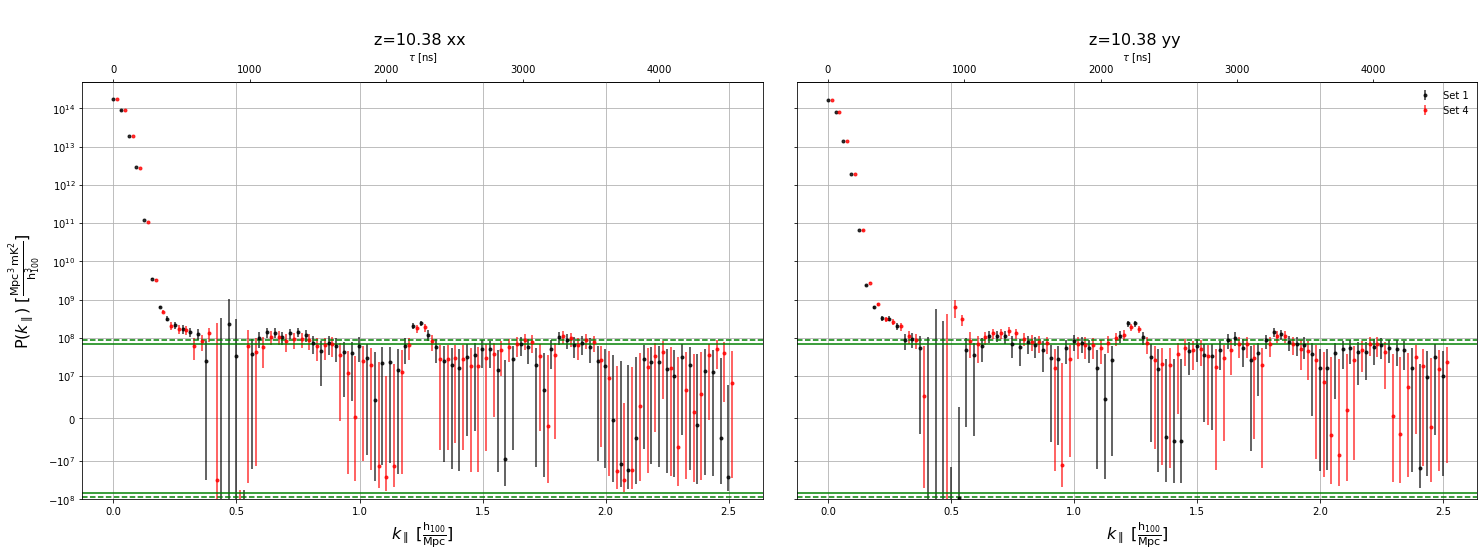

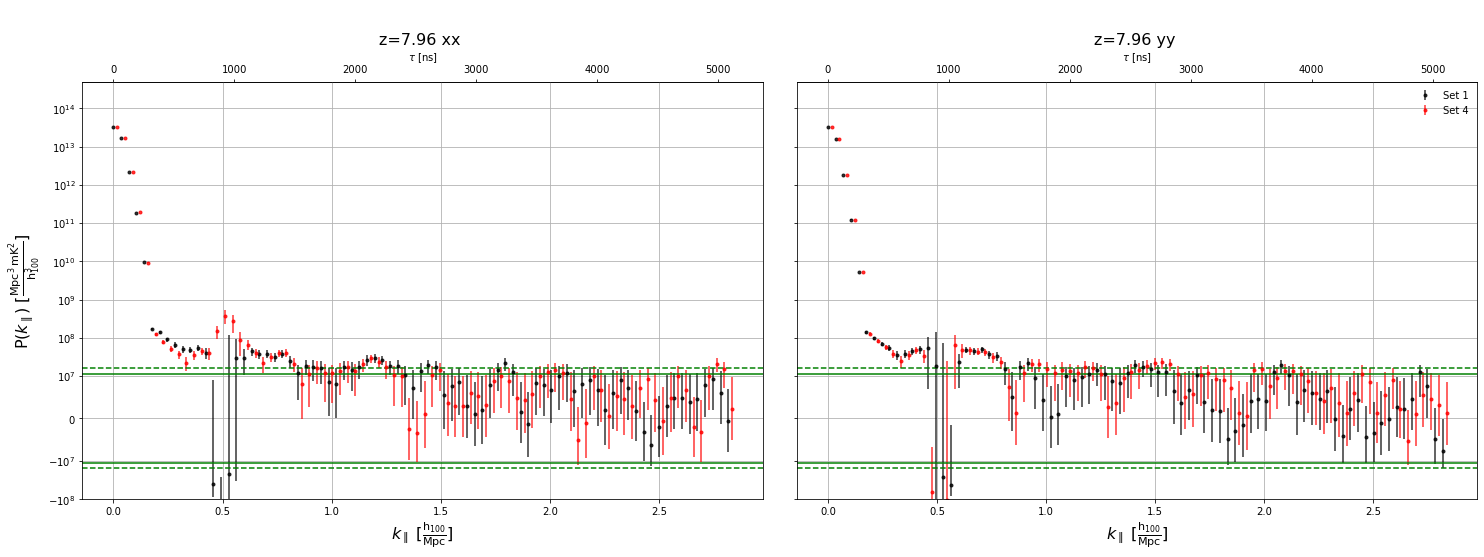

In [14]:
for z_cnt, redshift in enumerate(lst_set_1.redshift):
    fig, ax = plt.subplots(
            ncols=2, 
            nrows=1, 
            figsize=(25,8),
            facecolor='white',
            sharex=True,
            sharey=True,
            squeeze=False
        )
    ax = ax.ravel()

    for pol_ind, pol in enumerate(lst_set_1.polarization_array):
        ax[pol_ind].errorbar(
            lst_set_1.k_parallel[z_cnt],
            lst_set_1.avg_values[z_cnt, pol_ind].real,
            2 * lst_set_1.avg_errors[z_cnt, pol_ind].real,
            fmt='k.', alpha=.8,
            label="Set 1" if pol_ind==1 else ''
        );
        ax[pol_ind].errorbar(
            lst_set_4.k_parallel[z_cnt] + np.diff(lst_set_4.k_parallel[z_cnt])[0]*1./2.,
            lst_set_4.avg_values[z_cnt, pol_ind].real,
            2 * lst_set_4.avg_errors[z_cnt, pol_ind].real,
            fmt='r.', alpha=.8,
            label="Set 4" if pol_ind==1 else ''
        );
#         ax[pol_ind].errorbar(
#             set_1.k_parallel[z_cnt][80:] + np.diff(set_1.k_parallel[z_cnt])[0]*2/3.,
#             set_1.avg_noise_values[z_cnt, pol_ind].real,
#             2 * set_1.avg_noise_errors[z_cnt, pol_ind].real,
#             fmt='.', color="XKCD:Orange", alpha=.5,
#             label="Data" if pol_ind==0 else ''
#         );
#         ax[pol_ind].plot(
#             ds_list[0].k_parallel[z_cnt][80:],
#             psf[80:] * avg_values[z_cnt, pol_ind].max(),
                
#         )

        ax[pol_ind].axhline(2 * lst_set_1.avg_pn[z_cnt, pol_ind], color="green")
        ax[pol_ind].axhline(-2 * lst_set_1.avg_pn[z_cnt, pol_ind], color="green")

        ax[pol_ind].axhline(2 * lst_set_1.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        ax[pol_ind].axhline(-2 * lst_set_1.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        
        ax[pol_ind].set_xlabel(r'$k_{{\parallel}}$ [{0}]'.format(lst_set_1.k_parallel.unit.to_string('latex')), fontsize=16)
        ax[pol_ind].set_title(
            f"z={redshift:.2f} "
            f"{pol} "
            , fontsize=16,
        )
        if pol_ind == 0:
            ax[pol_ind].set_ylabel(r'P($k_{{\parallel}}$) [{0}]'.format((lst_set_1.avg_values.unit).to_string('latex')), fontsize=16)
        else:
            ax[pol_ind].set_ylabel("")
        
        def forward(x):
            x = x * lst_set_1.k_parallel.unit
            x = x.to("1/Mpc", units.with_H0(cosmo.default_cosmology.get().H0))
            return cosmo.kparr2eta(x, redshift).to_value("ns")
        def inverse(x):
            x = cosmo.eta2kparr(x  * lst_set_1.delays.unit, redshift)
            x = x.to(lst_set_1.k_parallel.unit, units.with_H0(cosmo.default_cosmology.get().H0)).value
            return x
        secax = ax[pol_ind].secondary_xaxis('top', functions=(forward, inverse))
        secax.set_xlabel(r"$\tau$ [ns]")
        
    sharex = ax[0].get_shared_x_axes()
    for pol_cnt in range(lst_set_1.polarization_array.size):
        sharex.join(ax[0], ax[pol_cnt])
        ax[pol_cnt].grid();

    sharey = ax[0].get_shared_y_axes()
    for pol_cnt in range(lst_set_1.polarization_array.size):
        sharey.join(ax[0], ax[pol_cnt])
    ax[0].set_yscale('symlog', linthresh=1e7)
    ax[0].set_ylim(-1e8, 5e14)
    ax[-1].legend(loc="upper right", frameon=False,)
    fig.subplots_adjust(wspace=.05, hspace=.175, top=.85)
    fig.suptitle(
        f" " 
    );
    plt.savefig(f"comparison_sets_1_4_z{redshift:.0f}_long_bad.pdf")    

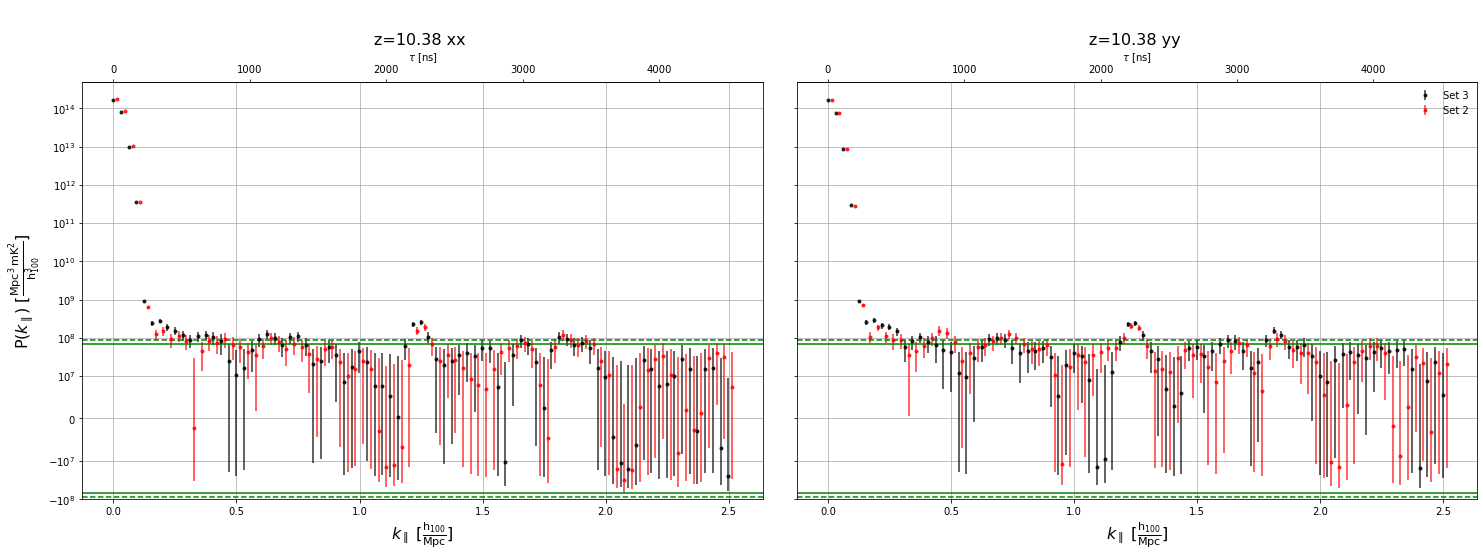

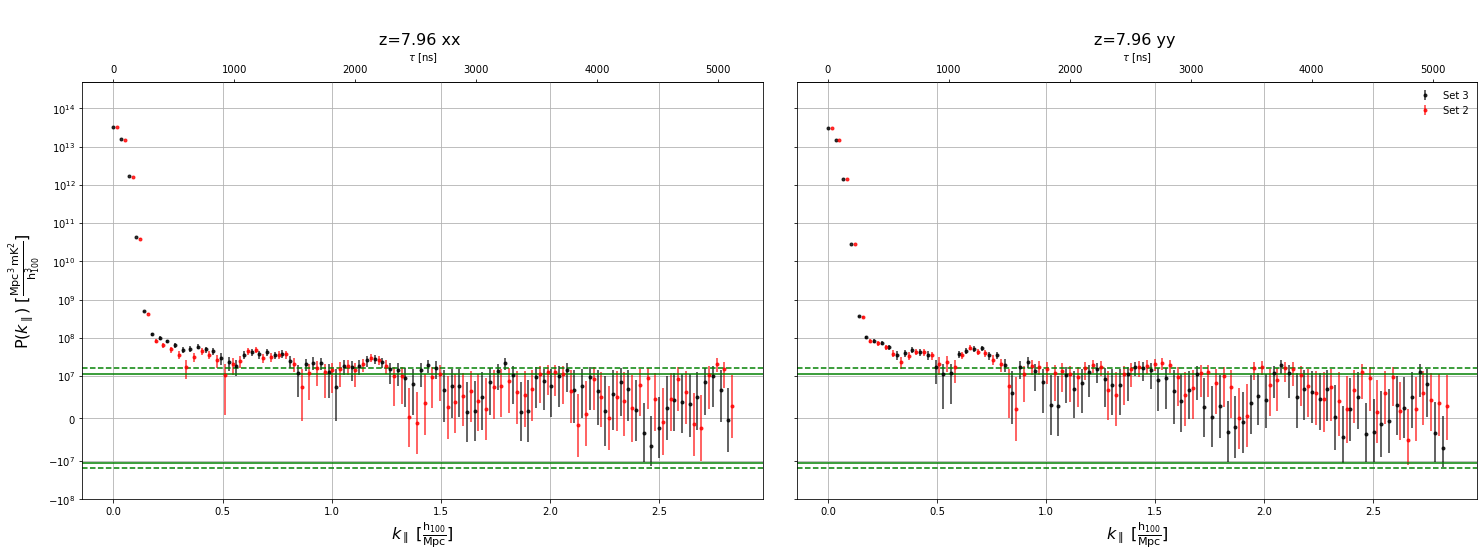

In [16]:
for z_cnt, redshift in enumerate(lst_set_3.redshift):
    fig, ax = plt.subplots(
            ncols=2, 
            nrows=1, 
            figsize=(25,8),
            facecolor='white',
            sharex=True,
            sharey=True,
            squeeze=False
        )
    ax = ax.ravel()

    for pol_ind, pol in enumerate(lst_set_3.polarization_array):
        ax[pol_ind].errorbar(
            lst_set_3.k_parallel[z_cnt],
            lst_set_3.avg_values[z_cnt, pol_ind].real,
            2 * lst_set_3.avg_errors[z_cnt, pol_ind].real,
            fmt='k.', alpha=.8,
            label="Set 3" if pol_ind==1 else ''
        );
        ax[pol_ind].errorbar(
            lst_set_2.k_parallel[z_cnt] + np.diff(lst_set_2.k_parallel[z_cnt])[0]*1./2.,
            lst_set_2.avg_values[z_cnt, pol_ind].real,
            2 * lst_set_2.avg_errors[z_cnt, pol_ind].real,
            fmt='r.', alpha=.8,
            label="Set 2" if pol_ind==1 else ''
        );
#         ax[pol_ind].errorbar(
#             set_1.k_parallel[z_cnt][80:] + np.diff(set_1.k_parallel[z_cnt])[0]*2/3.,
#             set_1.avg_noise_values[z_cnt, pol_ind].real,
#             2 * set_1.avg_noise_errors[z_cnt, pol_ind].real,
#             fmt='.', color="XKCD:Orange", alpha=.5,
#             label="Data" if pol_ind==0 else ''
#         );
#         ax[pol_ind].plot(
#             ds_list[0].k_parallel[z_cnt][80:],
#             psf[80:] * avg_values[z_cnt, pol_ind].max(),
                
#         )

        ax[pol_ind].axhline(2 * lst_set_3.avg_pn[z_cnt, pol_ind], color="green")
        ax[pol_ind].axhline(-2 * lst_set_3.avg_pn[z_cnt, pol_ind], color="green")
        
        # multiply by a factor of 2 beacuse simpleDS overestimates the number of LST bins
        ax[pol_ind].axhline(2 * lst_set_3.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        ax[pol_ind].axhline(-2 * lst_set_3.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        ax[pol_ind].set_xlabel(r'$k_{{\parallel}}$ [{0}]'.format(lst_set_3.k_parallel.unit.to_string('latex')), fontsize=16)
        ax[pol_ind].set_title(
            f"z={redshift:.2f} "
            f"{pol} "
            , fontsize=16,
        )
        if pol_ind == 0:
            ax[pol_ind].set_ylabel(r'P($k_{{\parallel}}$) [{0}]'.format((lst_set_3.avg_values.unit).to_string('latex')), fontsize=16)
        else:
            ax[pol_ind].set_ylabel("")
        
        def forward(x):
            x = x * lst_set_3.k_parallel.unit
            x = x.to("1/Mpc", units.with_H0(cosmo.default_cosmology.get().H0))
            return cosmo.kparr2eta(x, redshift).to_value("ns")
        def inverse(x):
            x = cosmo.eta2kparr(x  * lst_set_3.delays.unit, redshift)
            x = x.to(lst_set_3.k_parallel.unit, units.with_H0(cosmo.default_cosmology.get().H0)).value
            return x
        secax = ax[pol_ind].secondary_xaxis('top', functions=(forward, inverse))
        secax.set_xlabel(r"$\tau$ [ns]")
        
    sharex = ax[0].get_shared_x_axes()
    for pol_cnt in range(lst_set_3.polarization_array.size):
        sharex.join(ax[0], ax[pol_cnt])
        ax[pol_cnt].grid();

    sharey = ax[0].get_shared_y_axes()
    for pol_cnt in range(lst_set_3.polarization_array.size):
        sharey.join(ax[0], ax[pol_cnt])
    ax[0].set_yscale('symlog', linthresh=1e7)
    ax[0].set_ylim(-1e8, 5e14)
    ax[-1].legend(loc="upper right", frameon=False,)
    fig.subplots_adjust(wspace=.05, hspace=.175, top=.85)
    fig.suptitle(
        f" " 
    );
    plt.savefig(f"comparison_sets_2_3_z{redshift:.0f}_long_bad.pdf")        

# Short Bad

In [13]:
lst_set_1 = PowerSpectra(short_bad[0])
lst_set_2 = PowerSpectra(short_bad[1])
lst_set_3 = PowerSpectra(short_bad[2])
lst_set_4 = PowerSpectra(short_bad[3])

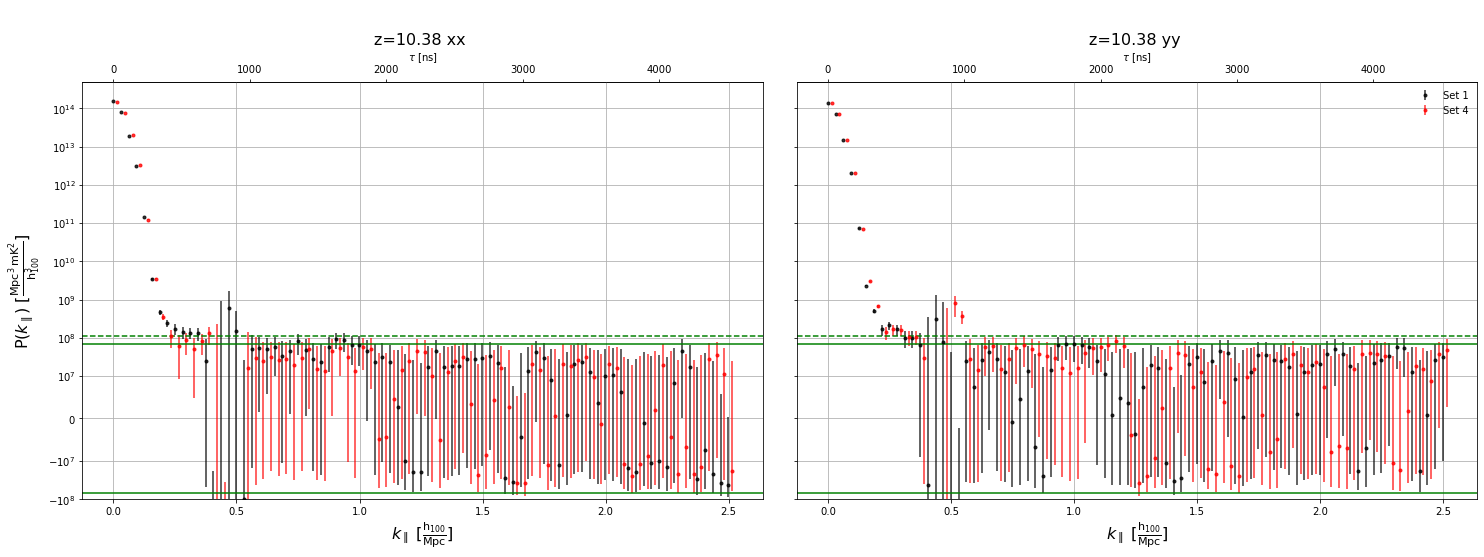

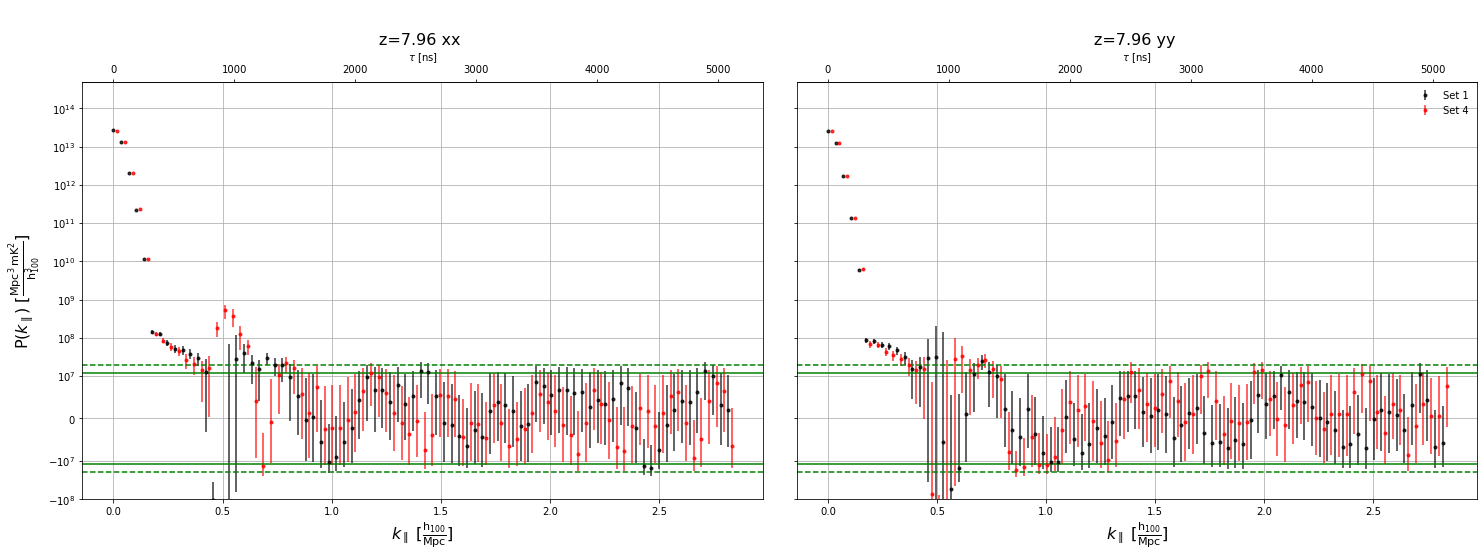

In [14]:
for z_cnt, redshift in enumerate(lst_set_1.redshift):
    fig, ax = plt.subplots(
            ncols=2, 
            nrows=1, 
            figsize=(25,8),
            facecolor='white',
            sharex=True,
            sharey=True,
            squeeze=False
        )
    ax = ax.ravel()

    for pol_ind, pol in enumerate(lst_set_1.polarization_array):
        ax[pol_ind].errorbar(
            lst_set_1.k_parallel[z_cnt],
            lst_set_1.avg_values[z_cnt, pol_ind].real,
            2 * lst_set_1.avg_errors[z_cnt, pol_ind].real,
            fmt='k.', alpha=.8,
            label="Set 1" if pol_ind==1 else ''
        );
        ax[pol_ind].errorbar(
            lst_set_4.k_parallel[z_cnt] + np.diff(lst_set_4.k_parallel[z_cnt])[0]*1./2.,
            lst_set_4.avg_values[z_cnt, pol_ind].real,
            2 * lst_set_4.avg_errors[z_cnt, pol_ind].real,
            fmt='r.', alpha=.8,
            label="Set 4" if pol_ind==1 else ''
        );
#         ax[pol_ind].errorbar(
#             set_1.k_parallel[z_cnt][80:] + np.diff(set_1.k_parallel[z_cnt])[0]*2/3.,
#             set_1.avg_noise_values[z_cnt, pol_ind].real,
#             2 * set_1.avg_noise_errors[z_cnt, pol_ind].real,
#             fmt='.', color="XKCD:Orange", alpha=.5,
#             label="Data" if pol_ind==0 else ''
#         );
#         ax[pol_ind].plot(
#             ds_list[0].k_parallel[z_cnt][80:],
#             psf[80:] * avg_values[z_cnt, pol_ind].max(),
                
#         )

        ax[pol_ind].axhline(2 * lst_set_1.avg_pn[z_cnt, pol_ind], color="green")
        ax[pol_ind].axhline(-2 * lst_set_1.avg_pn[z_cnt, pol_ind], color="green")

        ax[pol_ind].axhline(2 * lst_set_1.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        ax[pol_ind].axhline(-2 * lst_set_1.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        
        ax[pol_ind].set_xlabel(r'$k_{{\parallel}}$ [{0}]'.format(lst_set_1.k_parallel.unit.to_string('latex')), fontsize=16)
        ax[pol_ind].set_title(
            f"z={redshift:.2f} "
            f"{pol} "
            , fontsize=16,
        )
        if pol_ind == 0:
            ax[pol_ind].set_ylabel(r'P($k_{{\parallel}}$) [{0}]'.format((lst_set_1.avg_values.unit).to_string('latex')), fontsize=16)
        else:
            ax[pol_ind].set_ylabel("")
        
        def forward(x):
            x = x * lst_set_1.k_parallel.unit
            x = x.to("1/Mpc", units.with_H0(cosmo.default_cosmology.get().H0))
            return cosmo.kparr2eta(x, redshift).to_value("ns")
        def inverse(x):
            x = cosmo.eta2kparr(x  * lst_set_1.delays.unit, redshift)
            x = x.to(lst_set_1.k_parallel.unit, units.with_H0(cosmo.default_cosmology.get().H0)).value
            return x
        secax = ax[pol_ind].secondary_xaxis('top', functions=(forward, inverse))
        secax.set_xlabel(r"$\tau$ [ns]")
        
    sharex = ax[0].get_shared_x_axes()
    for pol_cnt in range(lst_set_1.polarization_array.size):
        sharex.join(ax[0], ax[pol_cnt])
        ax[pol_cnt].grid();

    sharey = ax[0].get_shared_y_axes()
    for pol_cnt in range(lst_set_1.polarization_array.size):
        sharey.join(ax[0], ax[pol_cnt])
    ax[0].set_yscale('symlog', linthresh=1e7)
    ax[0].set_ylim(-1e8, 5e14)
    ax[-1].legend(loc="upper right", frameon=False,)
    fig.subplots_adjust(wspace=.05, hspace=.175, top=.85)
    fig.suptitle(
        f" " 
    );
    plt.savefig(f"comparison_sets_1_4_z{redshift:.0f}_short_bad.pdf")    

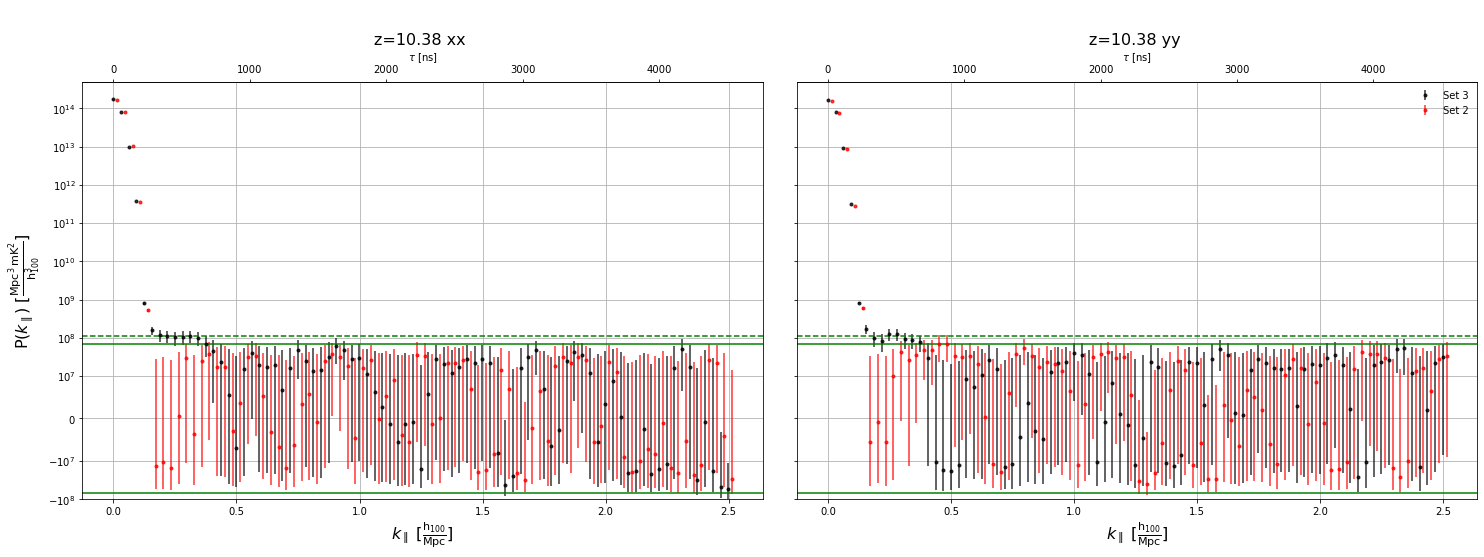

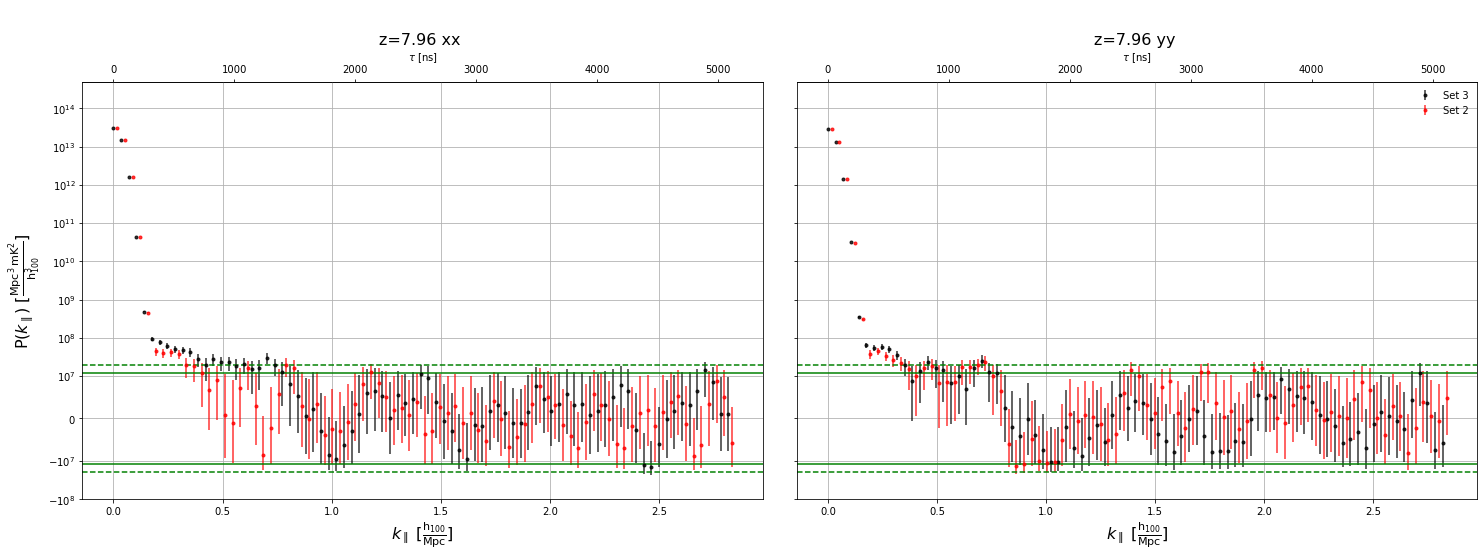

In [15]:
for z_cnt, redshift in enumerate(lst_set_3.redshift):
    fig, ax = plt.subplots(
            ncols=2, 
            nrows=1, 
            figsize=(25,8),
            facecolor='white',
            sharex=True,
            sharey=True,
            squeeze=False
        )
    ax = ax.ravel()

    for pol_ind, pol in enumerate(lst_set_3.polarization_array):
        ax[pol_ind].errorbar(
            lst_set_3.k_parallel[z_cnt],
            lst_set_3.avg_values[z_cnt, pol_ind].real,
            2 * lst_set_3.avg_errors[z_cnt, pol_ind].real,
            fmt='k.', alpha=.8,
            label="Set 3" if pol_ind==1 else ''
        );
        ax[pol_ind].errorbar(
            lst_set_2.k_parallel[z_cnt] + np.diff(lst_set_2.k_parallel[z_cnt])[0]*1./2.,
            lst_set_2.avg_values[z_cnt, pol_ind].real,
            2 * lst_set_2.avg_errors[z_cnt, pol_ind].real,
            fmt='r.', alpha=.8,
            label="Set 2" if pol_ind==1 else ''
        );
#         ax[pol_ind].errorbar(
#             set_1.k_parallel[z_cnt][80:] + np.diff(set_1.k_parallel[z_cnt])[0]*2/3.,
#             set_1.avg_noise_values[z_cnt, pol_ind].real,
#             2 * set_1.avg_noise_errors[z_cnt, pol_ind].real,
#             fmt='.', color="XKCD:Orange", alpha=.5,
#             label="Data" if pol_ind==0 else ''
#         );
#         ax[pol_ind].plot(
#             ds_list[0].k_parallel[z_cnt][80:],
#             psf[80:] * avg_values[z_cnt, pol_ind].max(),
                
#         )

        ax[pol_ind].axhline(2 * lst_set_3.avg_pn[z_cnt, pol_ind], color="green")
        ax[pol_ind].axhline(-2 * lst_set_3.avg_pn[z_cnt, pol_ind], color="green")
        
        # multiply by a factor of 2 beacuse simpleDS overestimates the number of LST bins
        ax[pol_ind].axhline(2 * lst_set_3.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        ax[pol_ind].axhline(-2 * lst_set_3.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        ax[pol_ind].set_xlabel(r'$k_{{\parallel}}$ [{0}]'.format(lst_set_3.k_parallel.unit.to_string('latex')), fontsize=16)
        ax[pol_ind].set_title(
            f"z={redshift:.2f} "
            f"{pol} "
            , fontsize=16,
        )
        if pol_ind == 0:
            ax[pol_ind].set_ylabel(r'P($k_{{\parallel}}$) [{0}]'.format((lst_set_3.avg_values.unit).to_string('latex')), fontsize=16)
        else:
            ax[pol_ind].set_ylabel("")
        
        def forward(x):
            x = x * set_1.k_parallel.unit
            x = x.to("1/Mpc", units.with_H0(cosmo.default_cosmology.get().H0))
            return cosmo.kparr2eta(x, redshift).to_value("ns")
        def inverse(x):
            x = cosmo.eta2kparr(x  * lst_set_3.delays.unit, redshift)
            x = x.to(lst_set_3.k_parallel.unit, units.with_H0(cosmo.default_cosmology.get().H0)).value
            return x
        secax = ax[pol_ind].secondary_xaxis('top', functions=(forward, inverse))
        secax.set_xlabel(r"$\tau$ [ns]")
        
    sharex = ax[0].get_shared_x_axes()
    for pol_cnt in range(lst_set_3.polarization_array.size):
        sharex.join(ax[0], ax[pol_cnt])
        ax[pol_cnt].grid();

    sharey = ax[0].get_shared_y_axes()
    for pol_cnt in range(lst_set_3.polarization_array.size):
        sharey.join(ax[0], ax[pol_cnt])
    ax[0].set_yscale('symlog', linthresh=1e7)
    ax[0].set_ylim(-1e8, 5e14)
    ax[-1].legend(loc="upper right", frameon=False,)
    fig.subplots_adjust(wspace=.05, hspace=.175, top=.85)
    fig.suptitle(
        f" " 
    );
    plt.savefig(f"comparison_sets_2_3_z{redshift:.0f}_short_bad.pdf")        

In [16]:
systematic_set_1 = PowerSpectra(systematic_files[0])
systematic_set_2 = PowerSpectra(systematic_files[1])
systematic_set_3 = PowerSpectra(systematic_files[2])
systematic_set_4 = PowerSpectra(systematic_files[3])

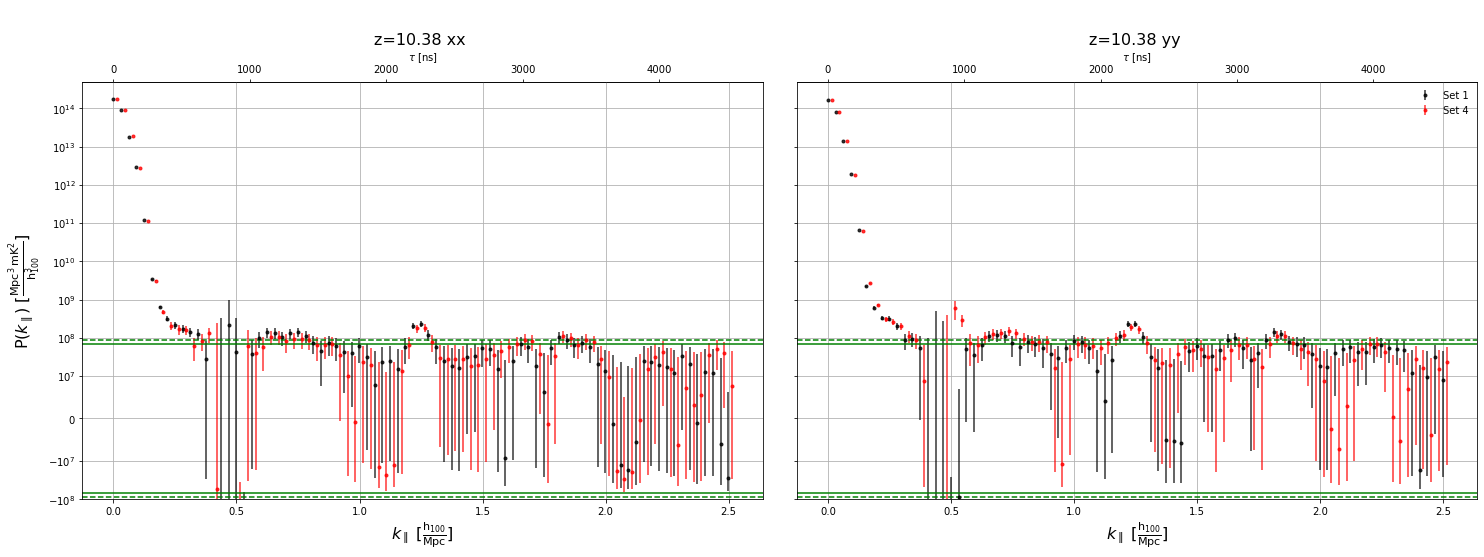

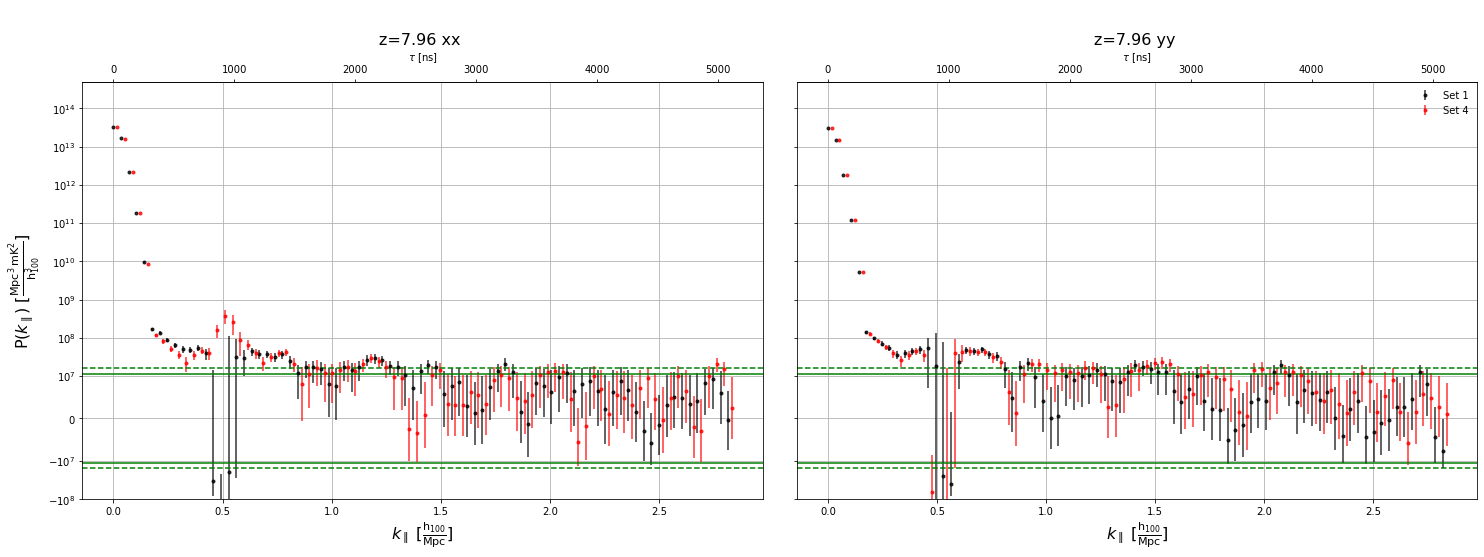

In [17]:
for z_cnt, redshift in enumerate(systematic_set_1.redshift):
    fig, ax = plt.subplots(
            ncols=2, 
            nrows=1, 
            figsize=(25,8),
            facecolor='white',
            sharex=True,
            sharey=True,
            squeeze=False
        )
    ax = ax.ravel()

    for pol_ind, pol in enumerate(systematic_set_1.polarization_array):
        ax[pol_ind].errorbar(
            systematic_set_1.k_parallel[z_cnt],
            systematic_set_1.avg_values[z_cnt, pol_ind].real,
            2 * systematic_set_1.avg_errors[z_cnt, pol_ind].real,
            fmt='k.', alpha=.8,
            label="Set 1" if pol_ind==1 else ''
        );
        ax[pol_ind].errorbar(
            systematic_set_4.k_parallel[z_cnt] + np.diff(systematic_set_4.k_parallel[z_cnt])[0]*1./2.,
            systematic_set_4.avg_values[z_cnt, pol_ind].real,
            2 * systematic_set_4.avg_errors[z_cnt, pol_ind].real,
            fmt='r.', alpha=.8,
            label="Set 4" if pol_ind==1 else ''
        );
#         ax[pol_ind].errorbar(
#             set_1.k_parallel[z_cnt][80:] + np.diff(set_1.k_parallel[z_cnt])[0]*2/3.,
#             set_1.avg_noise_values[z_cnt, pol_ind].real,
#             2 * set_1.avg_noise_errors[z_cnt, pol_ind].real,
#             fmt='.', color="XKCD:Orange", alpha=.5,
#             label="Data" if pol_ind==0 else ''
#         );
#         ax[pol_ind].plot(
#             ds_list[0].k_parallel[z_cnt][80:],
#             psf[80:] * avg_values[z_cnt, pol_ind].max(),
                
#         )

        ax[pol_ind].axhline(2 * systematic_set_1.avg_pn[z_cnt, pol_ind], color="green")
        ax[pol_ind].axhline(-2 * systematic_set_1.avg_pn[z_cnt, pol_ind], color="green")

        ax[pol_ind].axhline(2 * systematic_set_1.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        ax[pol_ind].axhline(-2 * systematic_set_1.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        
        ax[pol_ind].set_xlabel(r'$k_{{\parallel}}$ [{0}]'.format(systematic_set_1.k_parallel.unit.to_string('latex')), fontsize=16)
        ax[pol_ind].set_title(
            f"z={redshift:.2f} "
            f"{pol} "
            , fontsize=16,
        )
        if pol_ind == 0:
            ax[pol_ind].set_ylabel(r'P($k_{{\parallel}}$) [{0}]'.format((systematic_set_1.avg_values.unit).to_string('latex')), fontsize=16)
        else:
            ax[pol_ind].set_ylabel("")
        
        def forward(x):
            x = x * systematic_set_1.k_parallel.unit
            x = x.to("1/Mpc", units.with_H0(cosmo.default_cosmology.get().H0))
            return cosmo.kparr2eta(x, redshift).to_value("ns")
        def inverse(x):
            x = cosmo.eta2kparr(x  * systematic_set_1.delays.unit, redshift)
            x = x.to(systematic_set_1.k_parallel.unit, units.with_H0(cosmo.default_cosmology.get().H0)).value
            return x
        secax = ax[pol_ind].secondary_xaxis('top', functions=(forward, inverse))
        secax.set_xlabel(r"$\tau$ [ns]")
        
    sharex = ax[0].get_shared_x_axes()
    for pol_cnt in range(systematic_set_1.polarization_array.size):
        sharex.join(ax[0], ax[pol_cnt])
        ax[pol_cnt].grid();

    sharey = ax[0].get_shared_y_axes()
    for pol_cnt in range(systematic_set_1.polarization_array.size):
        sharey.join(ax[0], ax[pol_cnt])
    ax[0].set_yscale('symlog', linthresh=1e7)
    ax[0].set_ylim(-1e8, 5e14)
    ax[-1].legend(loc="upper right", frameon=False,)
    fig.subplots_adjust(wspace=.05, hspace=.175, top=.85)
    fig.suptitle(
        f" " 
    );
    plt.savefig(f"comparison_sets_1_4_z{redshift:.0f}_systematic.pdf")    

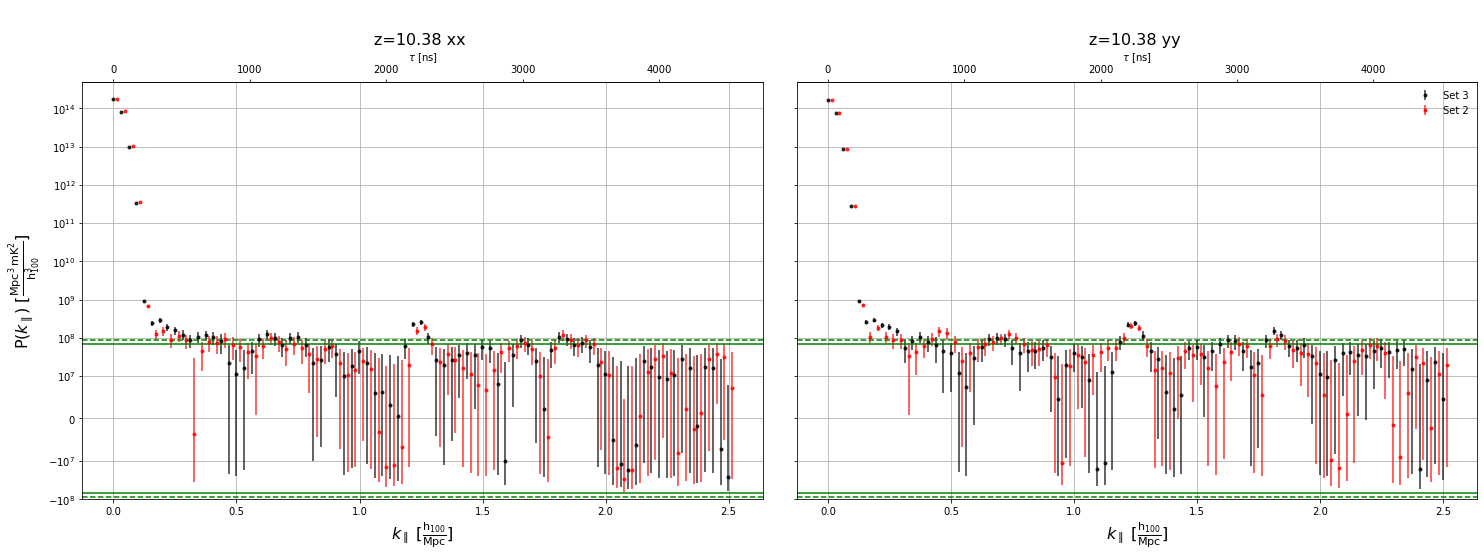

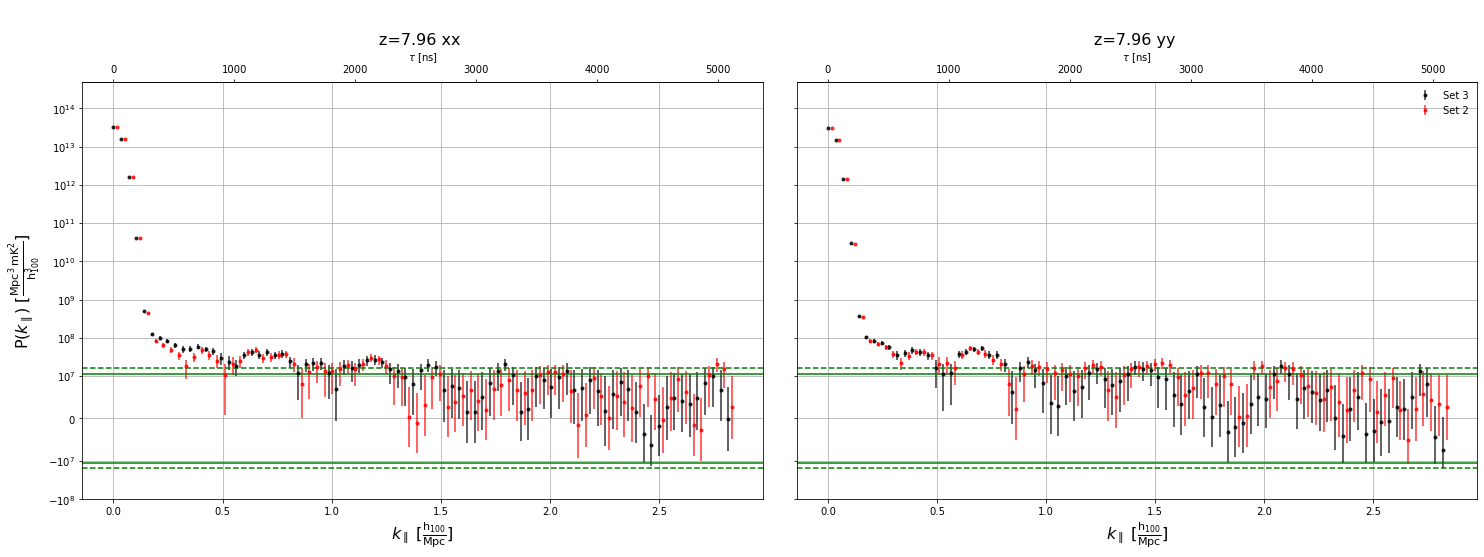

In [18]:
for z_cnt, redshift in enumerate(systematic_set_3.redshift):
    fig, ax = plt.subplots(
            ncols=2, 
            nrows=1, 
            figsize=(25,8),
            facecolor='white',
            sharex=True,
            sharey=True,
            squeeze=False
        )
    ax = ax.ravel()

    for pol_ind, pol in enumerate(systematic_set_1.polarization_array):
        ax[pol_ind].errorbar(
            systematic_set_3.k_parallel[z_cnt],
            systematic_set_3.avg_values[z_cnt, pol_ind].real,
            2 * systematic_set_3.avg_errors[z_cnt, pol_ind].real,
            fmt='k.', alpha=.8,
            label="Set 3" if pol_ind==1 else ''
        );
        ax[pol_ind].errorbar(
            systematic_set_2.k_parallel[z_cnt] + np.diff(systematic_set_2.k_parallel[z_cnt])[0]*1./2.,
            systematic_set_2.avg_values[z_cnt, pol_ind].real,
            2 * systematic_set_2.avg_errors[z_cnt, pol_ind].real,
            fmt='r.', alpha=.8,
            label="Set 2" if pol_ind==1 else ''
        );
#         ax[pol_ind].errorbar(
#             set_1.k_parallel[z_cnt][80:] + np.diff(set_1.k_parallel[z_cnt])[0]*2/3.,
#             set_1.avg_noise_values[z_cnt, pol_ind].real,
#             2 * set_1.avg_noise_errors[z_cnt, pol_ind].real,
#             fmt='.', color="XKCD:Orange", alpha=.5,
#             label="Data" if pol_ind==0 else ''
#         );
#         ax[pol_ind].plot(
#             ds_list[0].k_parallel[z_cnt][80:],
#             psf[80:] * avg_values[z_cnt, pol_ind].max(),
                
#         )

        ax[pol_ind].axhline(2 * systematic_set_3.avg_pn[z_cnt, pol_ind], color="green")
        ax[pol_ind].axhline(-2 * systematic_set_3.avg_pn[z_cnt, pol_ind], color="green")
        
        # multiply by a factor of 2 beacuse simpleDS overestimates the number of LST bins
        ax[pol_ind].axhline(2 * systematic_set_3.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        ax[pol_ind].axhline(-2 * systematic_set_3.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
        ax[pol_ind].set_xlabel(r'$k_{{\parallel}}$ [{0}]'.format(systematic_set_3.k_parallel.unit.to_string('latex')), fontsize=16)
        ax[pol_ind].set_title(
            f"z={redshift:.2f} "
            f"{pol} "
            , fontsize=16,
        )
        if pol_ind == 0:
            ax[pol_ind].set_ylabel(r'P($k_{{\parallel}}$) [{0}]'.format((systematic_set_3.avg_values.unit).to_string('latex')), fontsize=16)
        else:
            ax[pol_ind].set_ylabel("")
        
        def forward(x):
            x = x * set_1.k_parallel.unit
            x = x.to("1/Mpc", units.with_H0(cosmo.default_cosmology.get().H0))
            return cosmo.kparr2eta(x, redshift).to_value("ns")
        def inverse(x):
            x = cosmo.eta2kparr(x  * systematic_set_3.delays.unit, redshift)
            x = x.to(systematic_set_3.k_parallel.unit, units.with_H0(cosmo.default_cosmology.get().H0)).value
            return x
        secax = ax[pol_ind].secondary_xaxis('top', functions=(forward, inverse))
        secax.set_xlabel(r"$\tau$ [ns]")
        
    sharex = ax[0].get_shared_x_axes()
    for pol_cnt in range(systematic_set_3.polarization_array.size):
        sharex.join(ax[0], ax[pol_cnt])
        ax[pol_cnt].grid();

    sharey = ax[0].get_shared_y_axes()
    for pol_cnt in range(systematic_set_3.polarization_array.size):
        sharey.join(ax[0], ax[pol_cnt])
    ax[0].set_yscale('symlog', linthresh=1e7)
    ax[0].set_ylim(-1e8, 5e14)
    ax[-1].legend(loc="upper right", frameon=False,)
    fig.subplots_adjust(wspace=.05, hspace=.175, top=.85)
    fig.suptitle(
        f" " 
    );
    plt.savefig(f"comparison_sets_2_3_z{redshift:.0f}_systematic.pdf")        

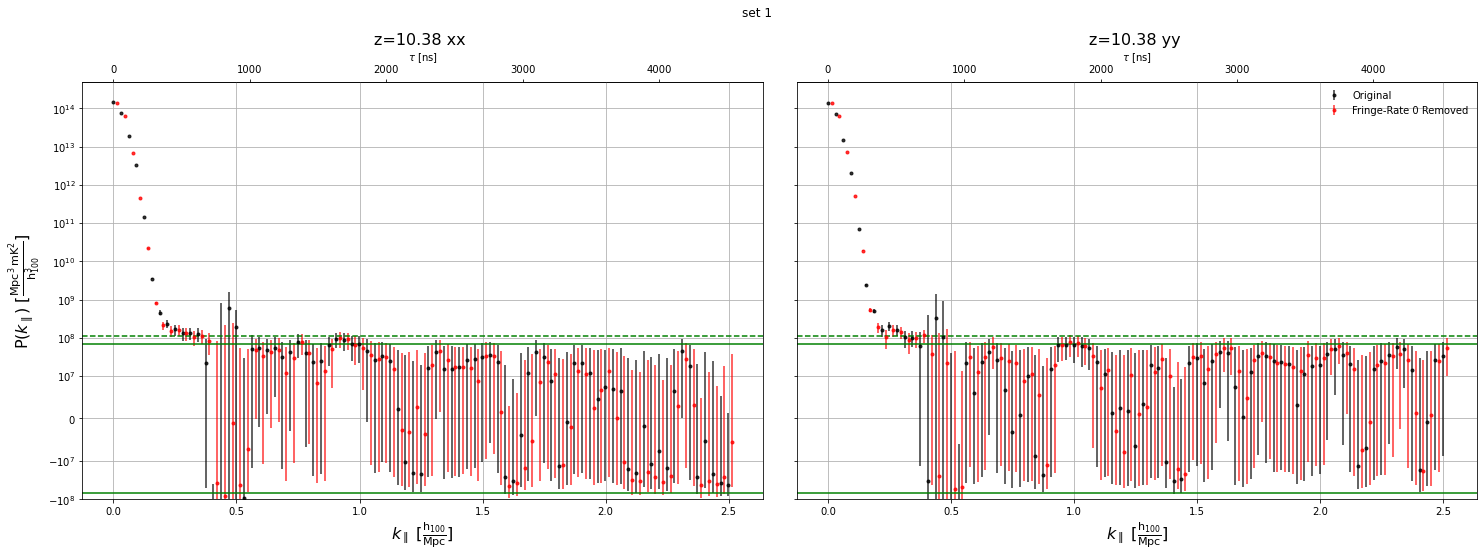

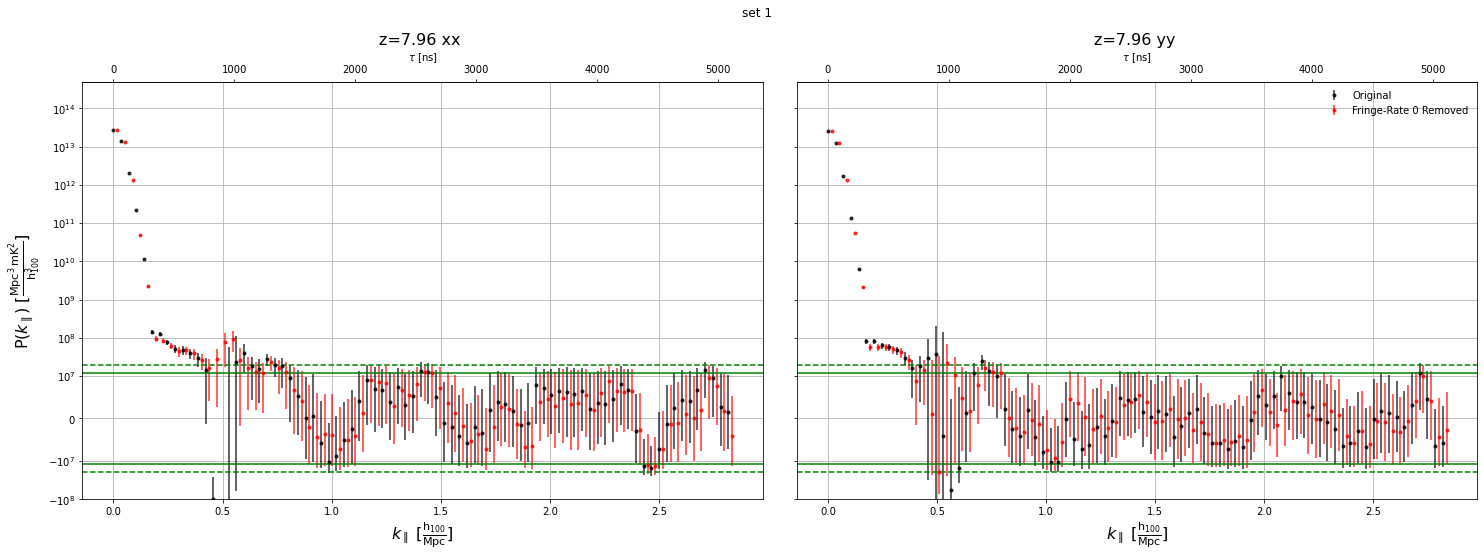

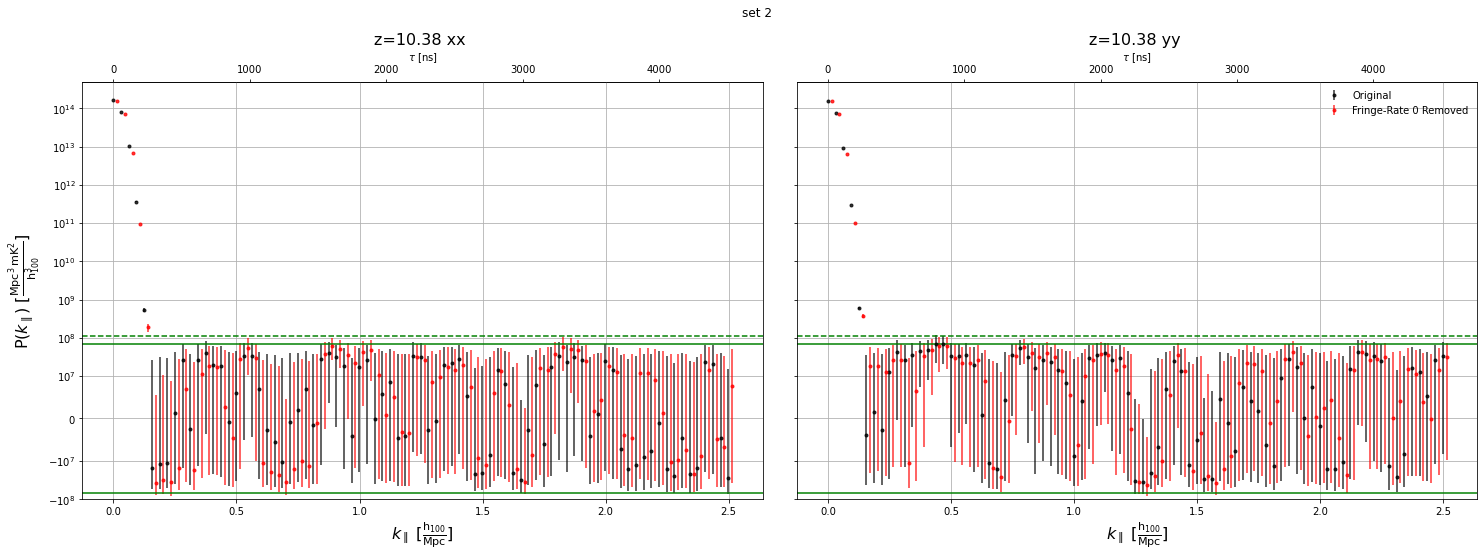

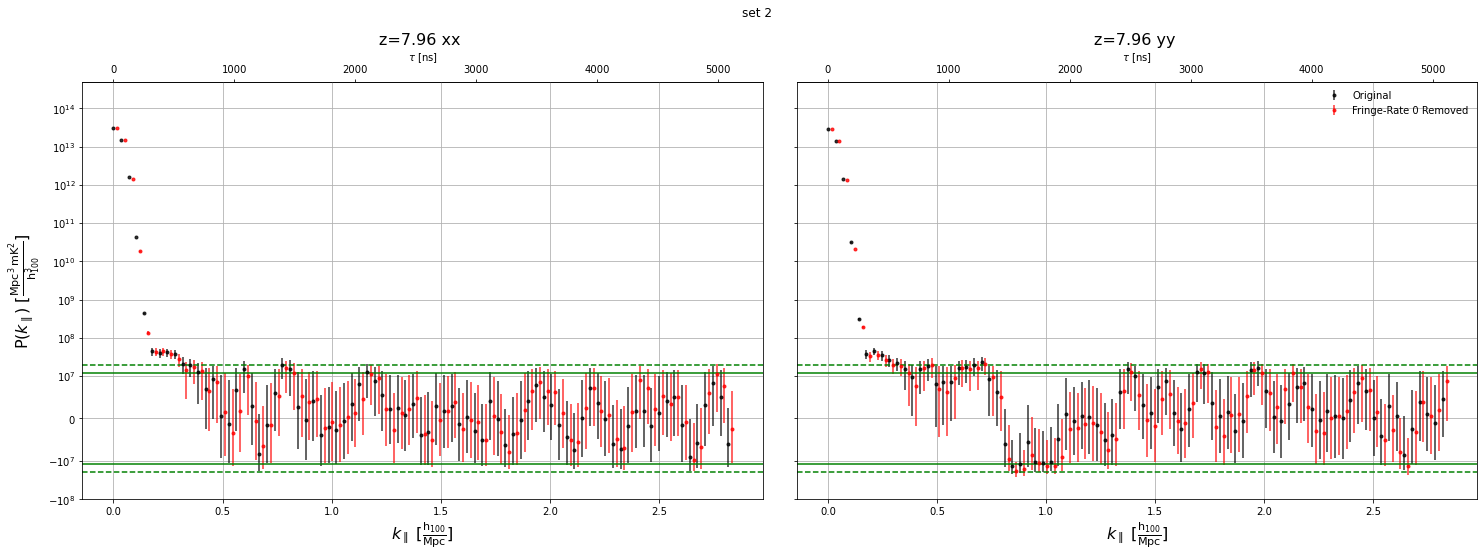

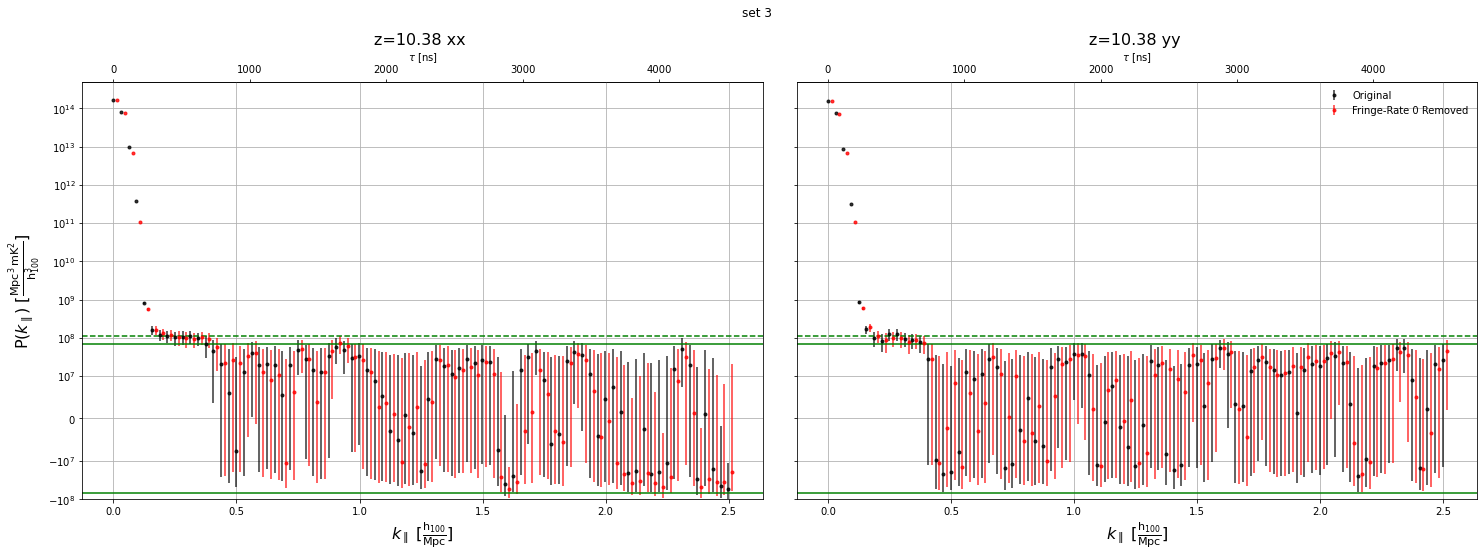

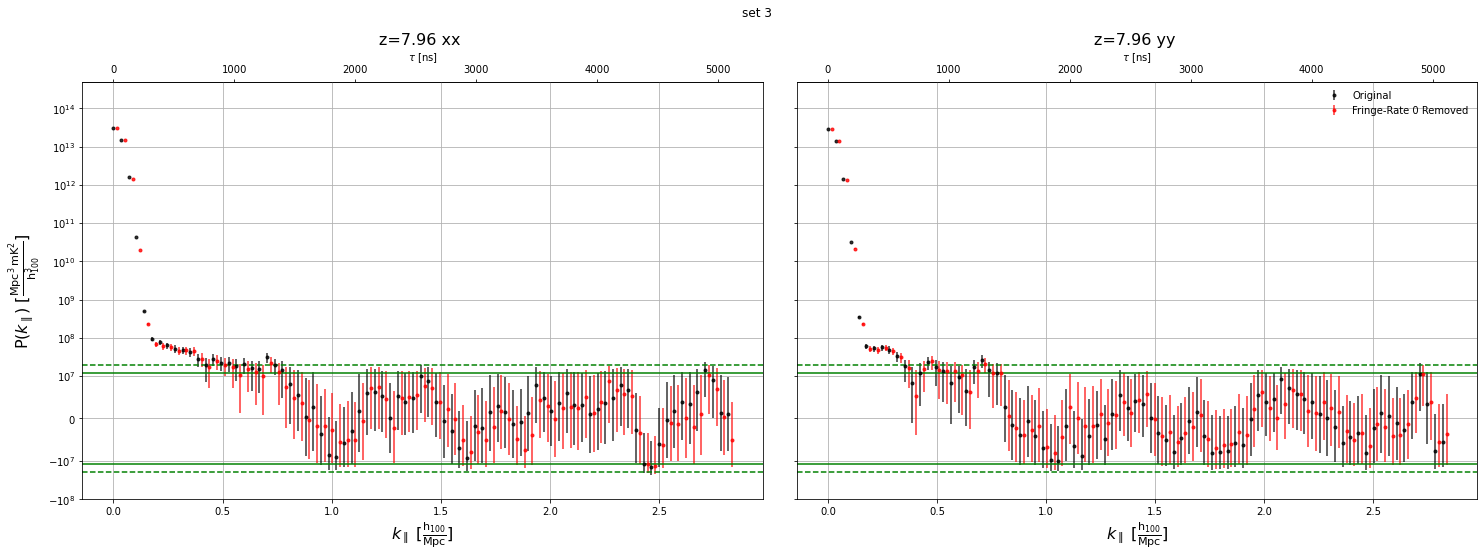

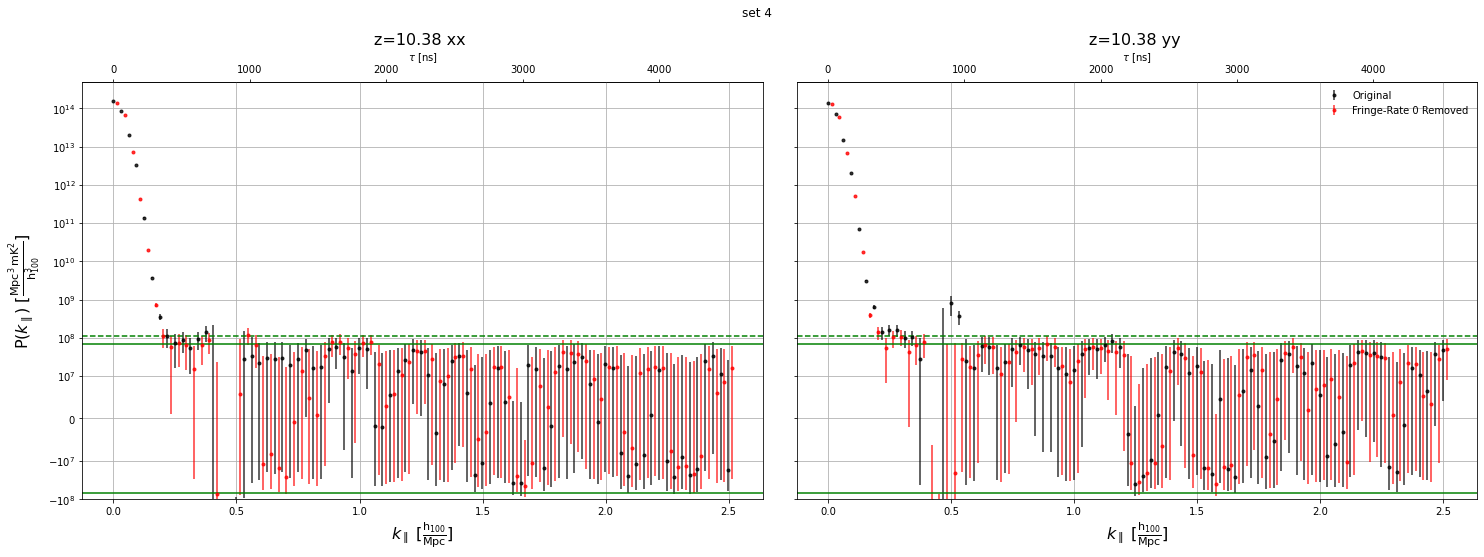

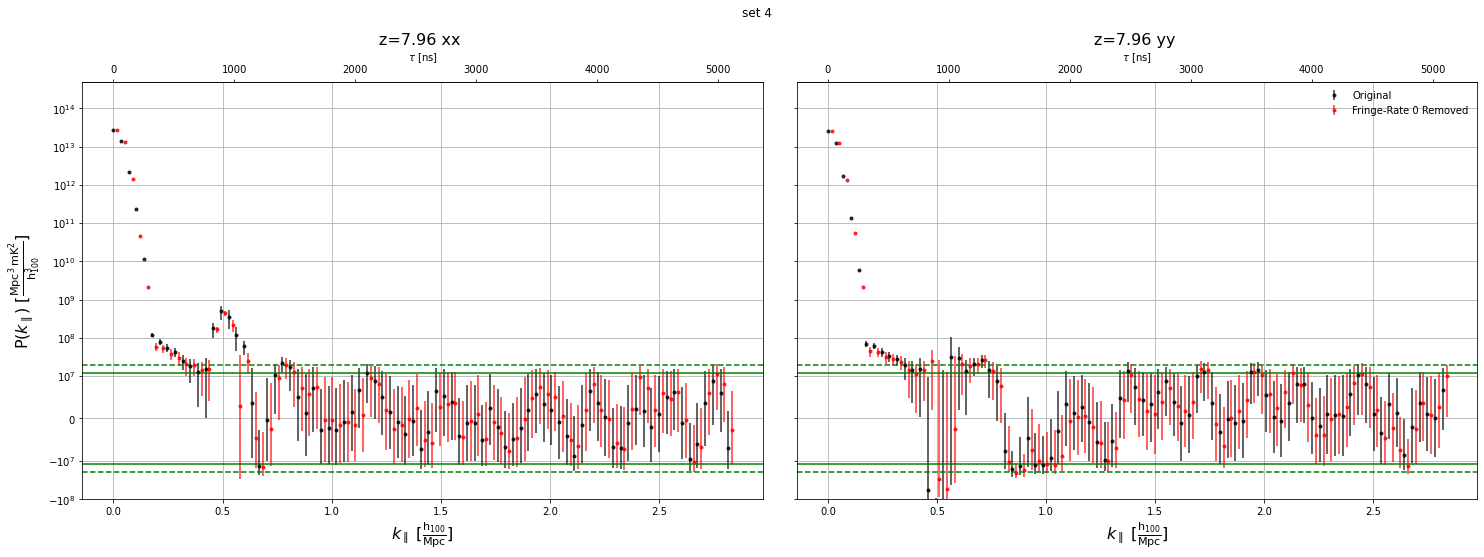

In [19]:
for set_cnt, set_num in enumerate(["set 1", "set 2", "set 3", "set 4"]):
    file_ind = [i for i, filename in enumerate(data_files) if set_num.replace(" ", "") in filename.name][0]
    remove_ind = [i for i, filename in enumerate(fringe_removed) if set_num.replace(" ", "") in filename.name][0]
    pspec = PowerSpectra(data_files[file_ind])
    pspec_no_fringe = PowerSpectra(fringe_removed[remove_ind])
    
    for z_cnt, redshift in enumerate(pspec.redshift):
        fig, ax = plt.subplots(
                ncols=2, 
                nrows=1, 
                figsize=(25,8),
                facecolor='white',
                sharex=True,
                sharey=True,
                squeeze=False
            )
        ax = ax.ravel()

        for pol_ind, pol in enumerate(pspec.polarization_array):
            ax[pol_ind].errorbar(
                pspec.k_parallel[z_cnt],
                pspec.avg_values[z_cnt, pol_ind].real,
                2 * pspec.avg_errors[z_cnt, pol_ind].real,
                fmt='k.', alpha=.8,
                label="Original" if pol_ind==1 else ''
            );
            ax[pol_ind].errorbar(
                pspec_no_fringe.k_parallel[z_cnt] + np.diff(pspec_no_fringe.k_parallel[z_cnt])[0]*1./2.,
                pspec_no_fringe.avg_values[z_cnt, pol_ind].real,
                2 * pspec_no_fringe.avg_errors[z_cnt, pol_ind].real,
                fmt='r.', alpha=.8,
                label="Fringe-Rate 0 Removed" if pol_ind==1 else ''
            );


            ax[pol_ind].axhline(2 * pspec.avg_pn[z_cnt, pol_ind], color="green")
            ax[pol_ind].axhline(-2 * pspec.avg_pn[z_cnt, pol_ind], color="green")

            # multiply by a factor of 2 beacuse simpleDS overestimates the number of LST bins
            ax[pol_ind].axhline(2 * pspec.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
            ax[pol_ind].axhline(-2 * pspec.avg_thermals[z_cnt, pol_ind], color="green", linestyle="--")
            ax[pol_ind].set_xlabel(r'$k_{{\parallel}}$ [{0}]'.format(pspec.k_parallel.unit.to_string('latex')), fontsize=16)
            ax[pol_ind].set_title(
                f"z={redshift:.2f} "
                f"{pol} "
                , fontsize=16,
            )
            if pol_ind == 0:
                ax[pol_ind].set_ylabel(r'P($k_{{\parallel}}$) [{0}]'.format((pspec.avg_values.unit).to_string('latex')), fontsize=16)
            else:
                ax[pol_ind].set_ylabel("")

            def forward(x):
                x = x * set_1.k_parallel.unit
                x = x.to("1/Mpc", units.with_H0(cosmo.default_cosmology.get().H0))
                return cosmo.kparr2eta(x, redshift).to_value("ns")
            def inverse(x):
                x = cosmo.eta2kparr(x  * set_1.delays.unit, redshift)
                x = x.to(set_1.k_parallel.unit, units.with_H0(cosmo.default_cosmology.get().H0)).value
                return x
            secax = ax[pol_ind].secondary_xaxis('top', functions=(forward, inverse))
            secax.set_xlabel(r"$\tau$ [ns]")

        sharex = ax[0].get_shared_x_axes()
        for pol_cnt in range(set_1.polarization_array.size):
            sharex.join(ax[0], ax[pol_cnt])
            ax[pol_cnt].grid();

        sharey = ax[0].get_shared_y_axes()
        for pol_cnt in range(set_1.polarization_array.size):
            sharey.join(ax[0], ax[pol_cnt])
        ax[0].set_yscale('symlog', linthresh=1e7)
        ax[0].set_ylim(-1e8, 5e14)
        ax[-1].legend(loc="upper right", frameon=False,)
        fig.subplots_adjust(wspace=.05, hspace=.175, top=.85)
        fig.suptitle(
            set_num 
        );
        plt.savefig(f"fringe_comparison_{set_num.replace(' ', '')}_z{redshift:.0f}.pdf")        
    